--------------
# PROBLEM-1:
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

-------------

* We will first load the necessary library files as per our requirements in the given below code cell.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Now, for problem-1 we will load the excel file named "Election data". Then will check the shape, Data types and statistical summary of the dataset. And then we will perform EDA.

In [3]:
filename = 'Election_Data.xlsx'
search_path = '/content/drive/My Drive'
# Search for the file
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
df = pd.read_excel(file_path , sheet_name='Election_Dataset_Two Classes')

In [4]:
df.head(3)

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male

* It seems that an unkonwn column/variable name "Unnamed: 0" that serves us no value will be removed.

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [7]:
df.tail()

vote  age  economic.cond.national  economic.cond.household  \
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female

In [8]:
df.shape

(1525, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
print(f"Total number of duplicated rows :{df.duplicated().sum()}")
df[df.duplicated()]

Total number of duplicated rows :8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(1517, 9)

In [15]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [16]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature,"---->")
        print(df[feature].value_counts())
        print("\n")

vote ---->
vote
Labour          1057
Conservative     460
Name: count, dtype: int64


gender ---->
gender
female    808
male      709
Name: count, dtype: int64




In [17]:
for feature in df.iloc[:,2:8]:
    print(feature,"---->")
    print(df[feature].value_counts())
    print("\n")


economic.cond.national ---->
economic.cond.national
3    604
4    538
2    256
5     82
1     37
Name: count, dtype: int64


economic.cond.household ---->
economic.cond.household
3    645
4    435
2    280
5     92
1     65
Name: count, dtype: int64


Blair ---->
Blair
4    833
2    434
5    152
1     97
3      1
Name: count, dtype: int64


Hague ---->
Hague
2    617
4    557
1    233
5     73
3     37
Name: count, dtype: int64


Europe ---->
Europe
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: count, dtype: int64


political.knowledge ---->
political.knowledge
2    776
0    454
3    249
1     38
Name: count, dtype: int64




In [18]:
df.skew(numeric_only=True)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

## Univariate Analysis

In [19]:
cols = df.select_dtypes(include='object').columns
cols

Index(['vote', 'gender'], dtype='object')

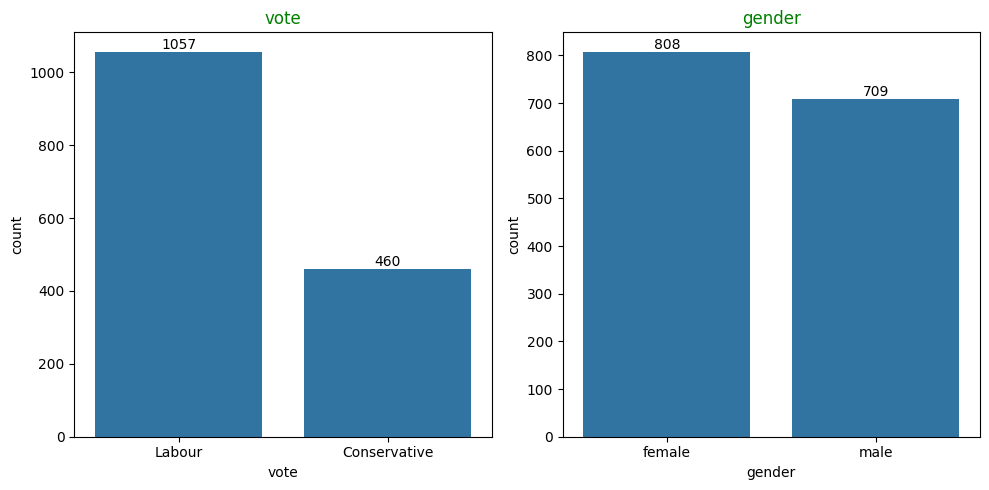

In [20]:
fig = plt.figure(figsize=(10,5))
cols = df.select_dtypes(include='object').columns
for i in range(0,len(cols)):
    plt.subplot(1,2,i+1)
    ax=sns.countplot(data=df,x=df[cols[i]],order=df[cols[i]].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars)
        plt.title("{}".format(cols[i]),color='green')
        plt.tight_layout()

Here 5 stands for High Score and 1 for Poor Score


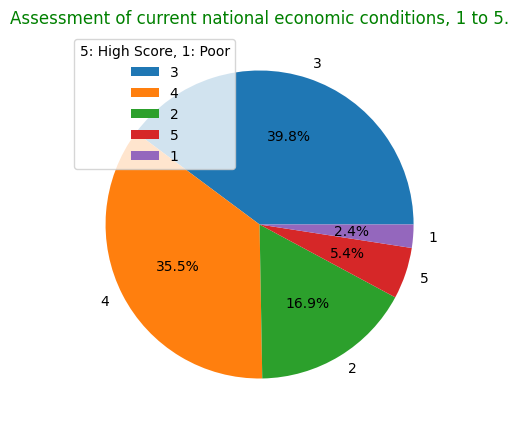

In [21]:
plt.figure(figsize=(5,5))
label = df["economic.cond.national"].value_counts().keys()
plt.pie(data=df,x=df["economic.cond.national"].value_counts(),labels=label,autopct="%.1f%%")
plt.title("Assessment of current national economic conditions, 1 to 5.",color='green')
print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(title = "5: High Score, 1: Poor",loc='upper left')
plt.show()

Here 5 stands for High Score and 1 for Poor Score


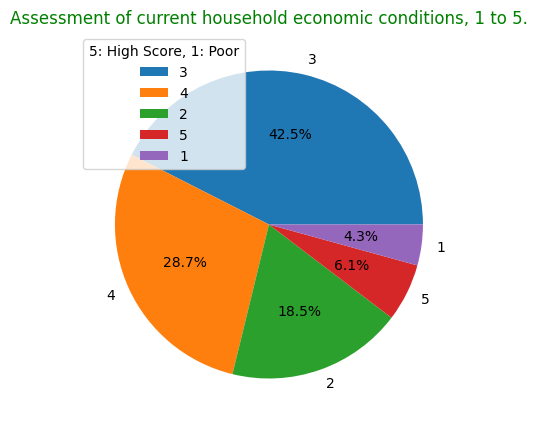

In [22]:
plt.figure(figsize=(5,5))
label = df['economic.cond.household'].value_counts().keys()
plt.pie(data=df,x=df["economic.cond.household"].value_counts(),labels=label,autopct="%.1f%%")
plt.title("Assessment of current household economic conditions, 1 to 5.",color='green')
print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(title = "5: High Score, 1: Poor",loc='upper left')

plt.show()


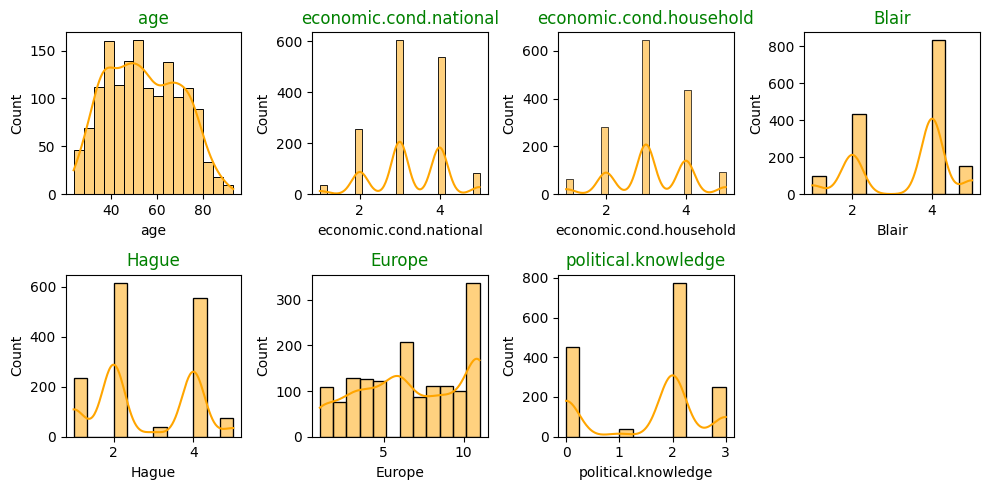

In [23]:
plt.figure(figsize=(10,5))
col = df.iloc[:,1:8].columns
for i in range(0,len(col)):
    plt.subplot(2,4,i+1)
    sns.histplot(data=df,x=df[col[i]],kde=True,color='orange')
    plt.title("{}".format(col[i]),color="green")
    plt.tight_layout()

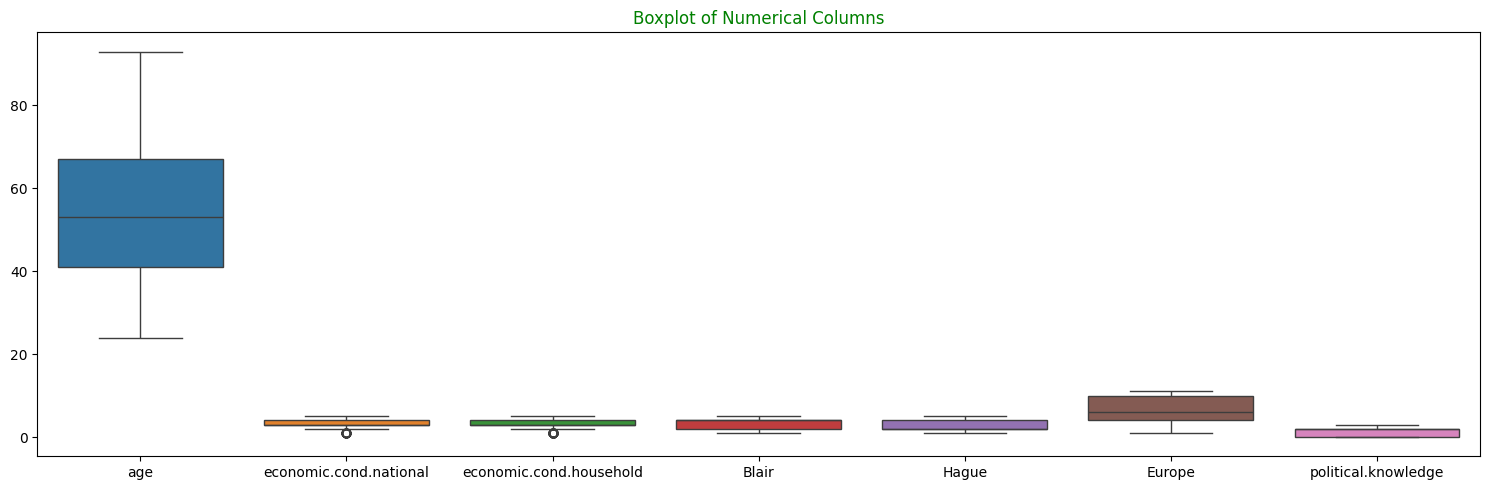

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(df)
plt.title("Boxplot of Numerical Columns",color='green')
plt.tight_layout()

## Bivariate Analysis

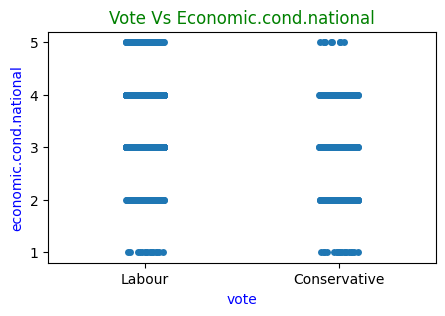

In [25]:
plt.figure(figsize=(5,3))
sns.stripplot(x=df["vote"],y=df["economic.cond.national"])
plt.title("Vote Vs Economic.cond.national",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("economic.cond.national",color='blue')
plt.show()

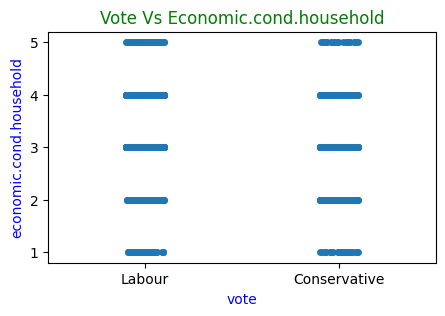

In [26]:
plt.figure(figsize=(5,3))
sns.stripplot(x=df["vote"],y=df["economic.cond.household"])
plt.title("Vote Vs Economic.cond.household",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("economic.cond.household",color='blue')
plt.show()

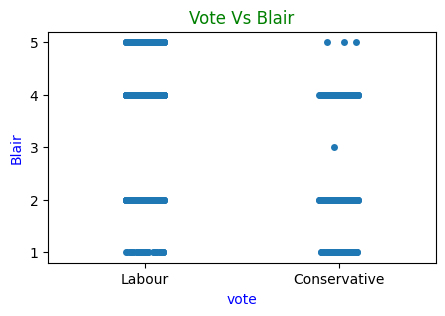

In [27]:
plt.figure(figsize=(5,3))
sns.stripplot(x=df["vote"],y=df["Blair"])
plt.title("Vote Vs Blair",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("Blair",color='blue')
plt.show()

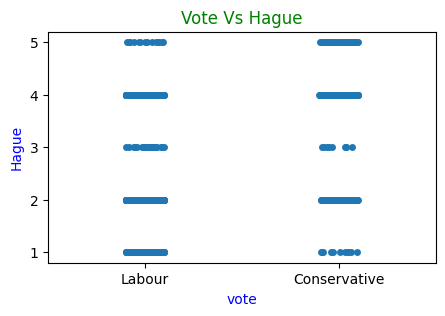

In [28]:
plt.figure(figsize=(5,3))
sns.stripplot(x=df["vote"],y=df["Hague"])
plt.title("Vote Vs Hague",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("Hague",color='blue')
plt.show()

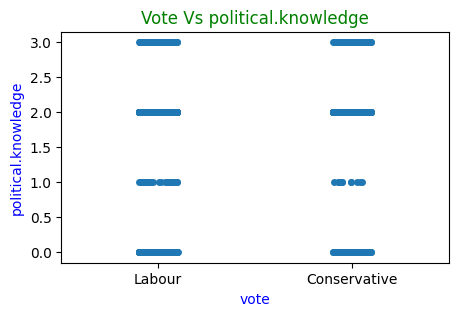

In [29]:
plt.figure(figsize=(5,3))
sns.stripplot(x=df["vote"],y=df["political.knowledge"])
plt.title("Vote Vs political.knowledge",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("political.knowledge",color='blue')
plt.show()

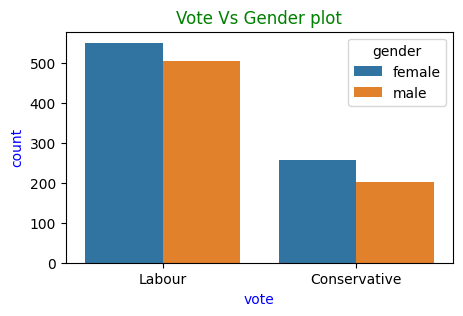

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='vote',hue="gender")
plt.title("Vote Vs Gender plot",color='green')
plt.xlabel("vote",color="blue")
plt.ylabel("count",color='blue')
plt.show()

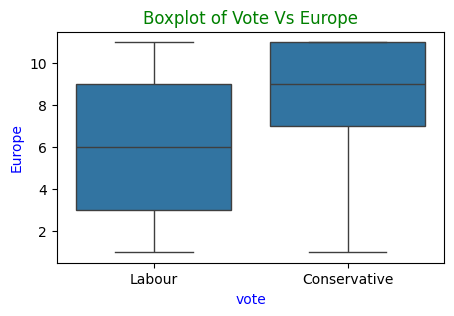

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['vote'],y=df['Europe'])
plt.title("Boxplot of Vote Vs Europe",color='green')
plt.xlabel("vote",color ='blue')
plt.ylabel("Europe",color='blue')
plt.show()

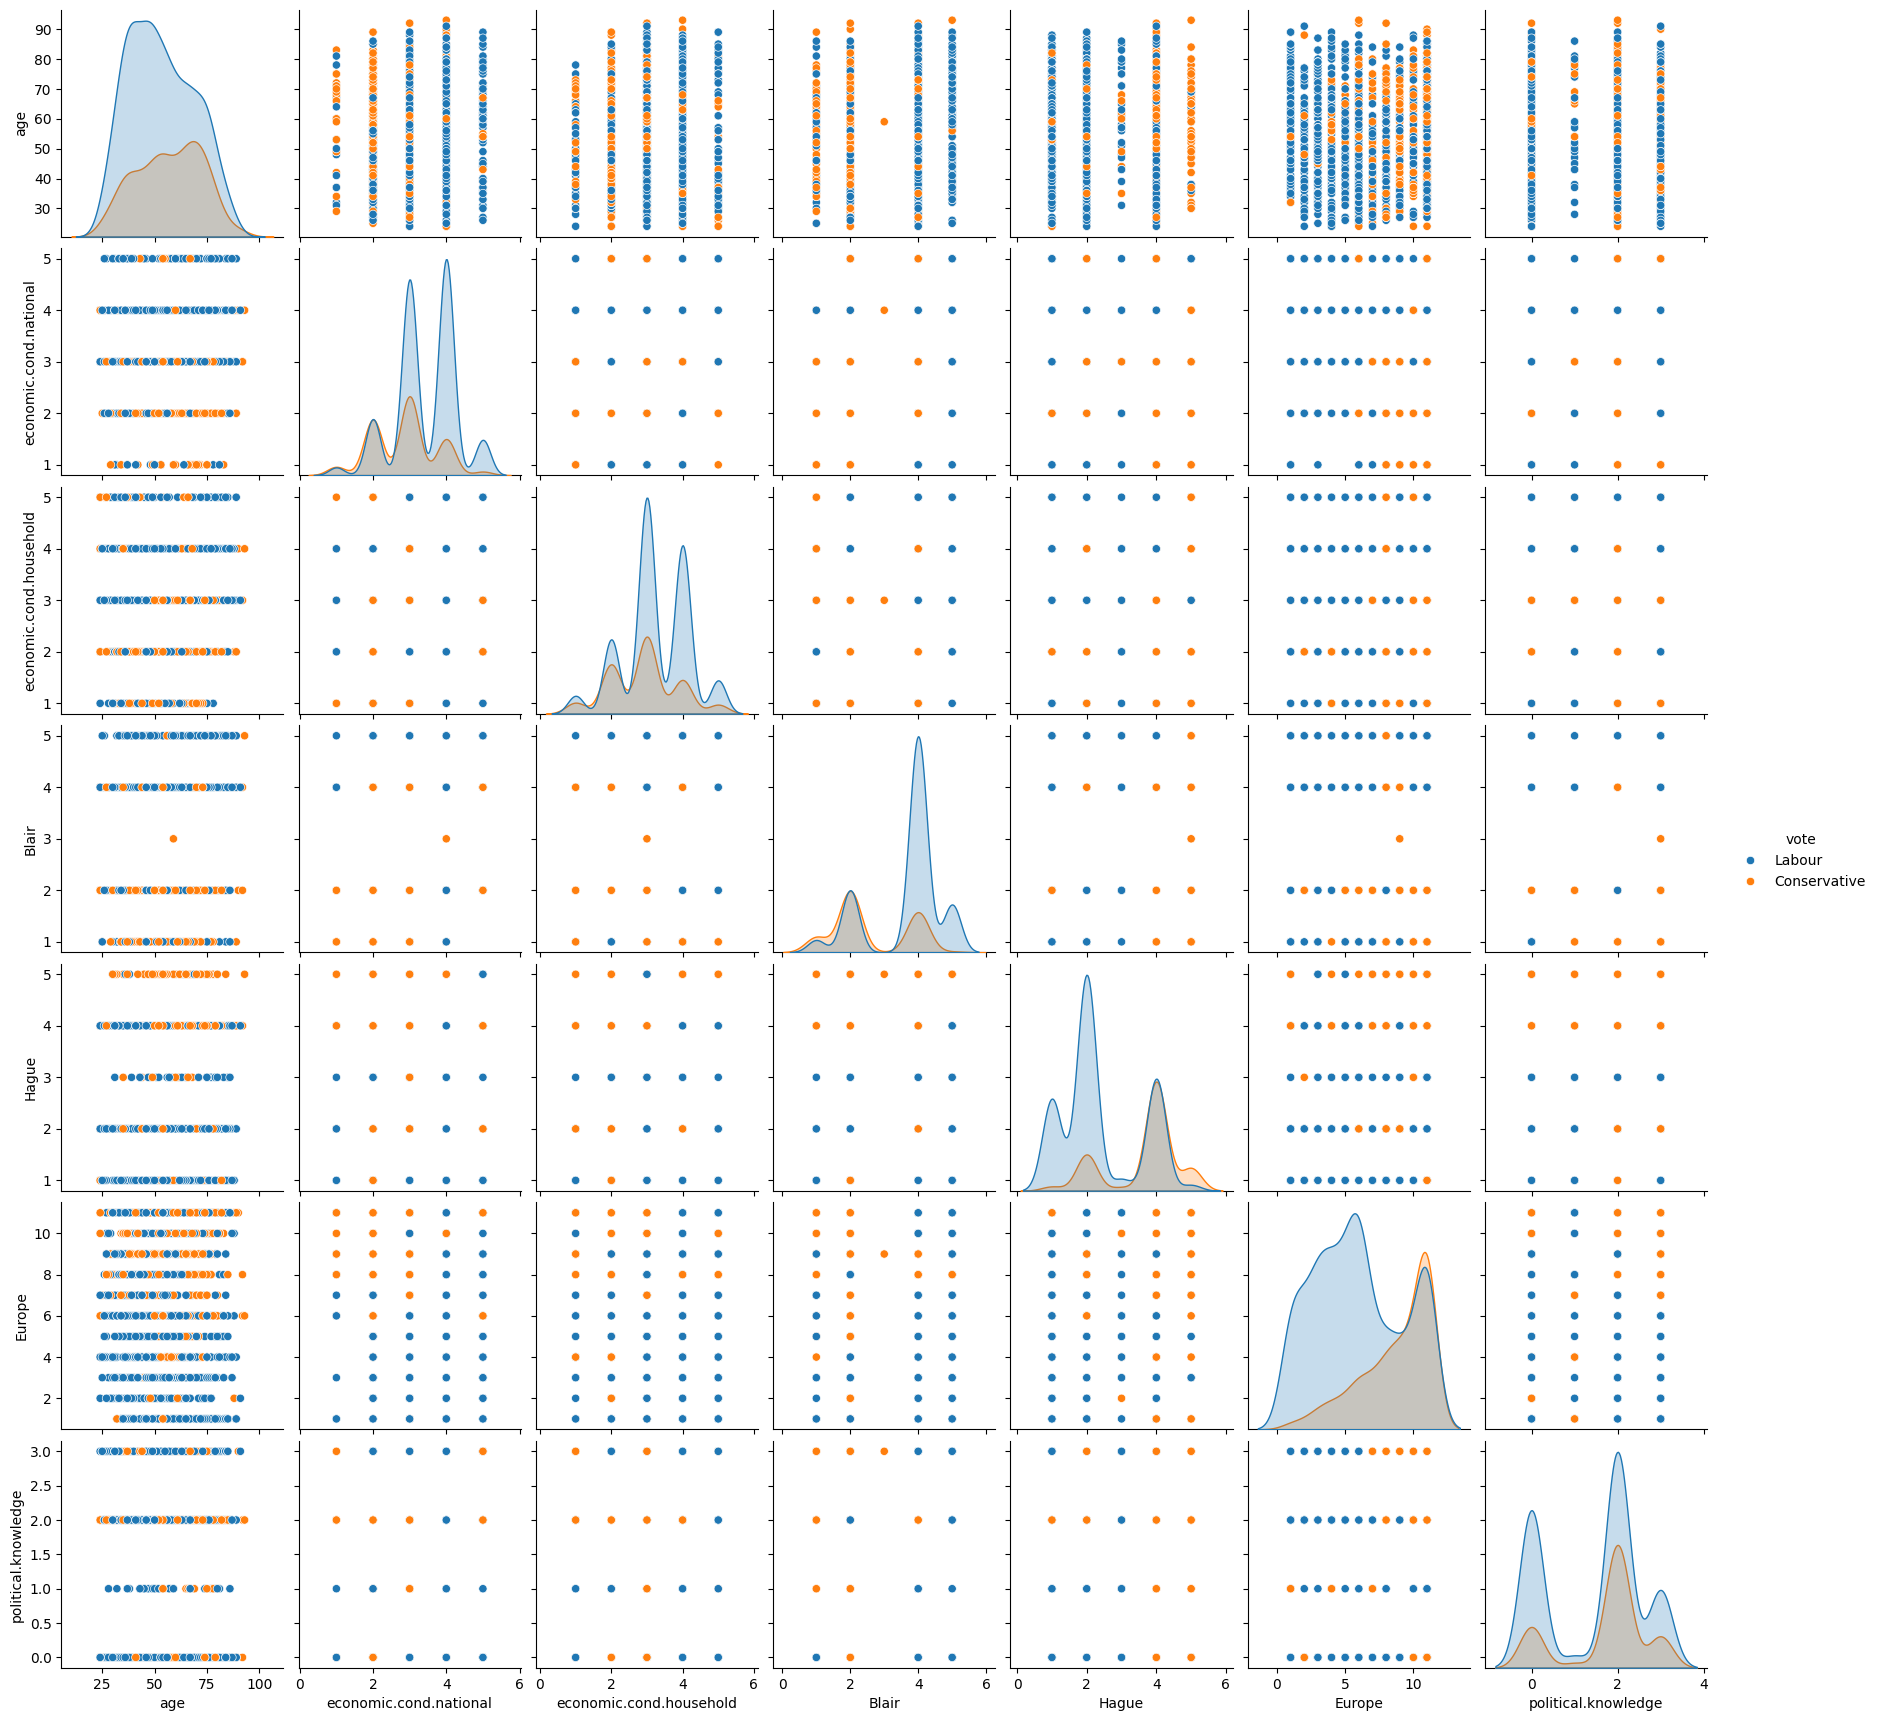

In [32]:
sns.pairplot(df,hue="vote")
plt.show()

In [33]:
df.corr(numeric_only=True)

age  economic.cond.national  \
age                      1.000000                0.018687   
economic.cond.national   0.018687                1.000000   
economic.cond.household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political.knowledge     -0.046598               -0.023510   

                         economic.cond.household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic.cond.national                  0.347687  0.326141 -0.200790   
economic.cond.household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political.knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political.knowledge  
age                      0.064562            -0.046598  
economic.cond.national  -0.209150            -0.023510  
economic.cond.household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political.knowledge     -0.151197             1.000000

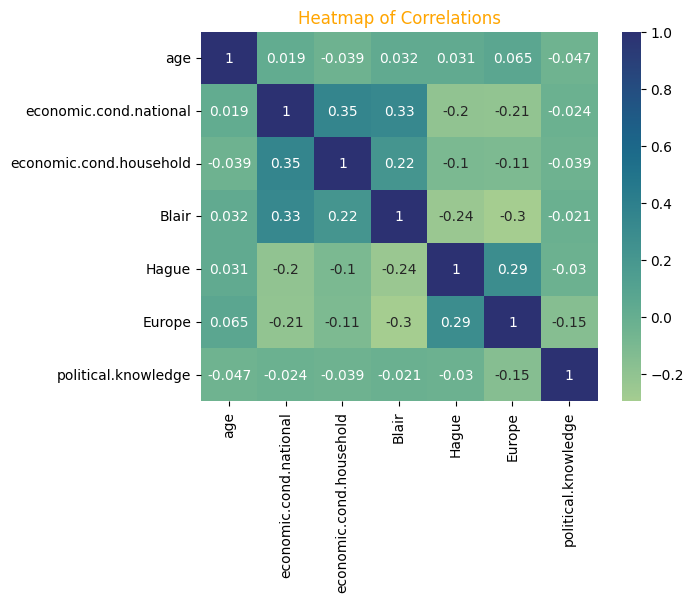

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.title("Heatmap of Correlations",color='orange')
plt.show()

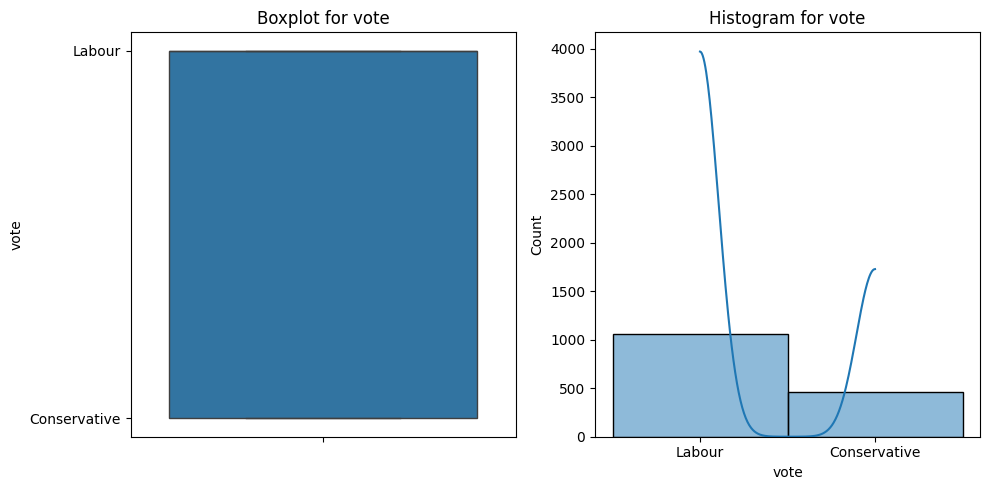

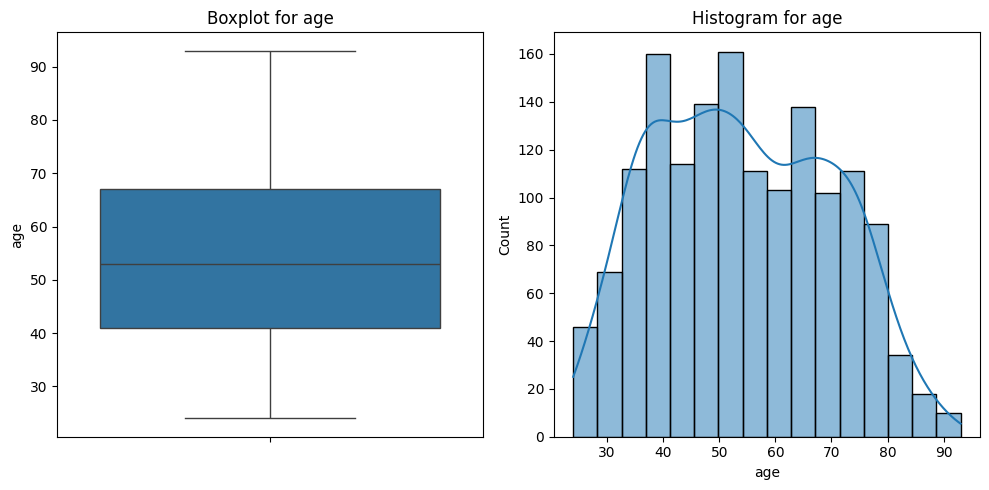

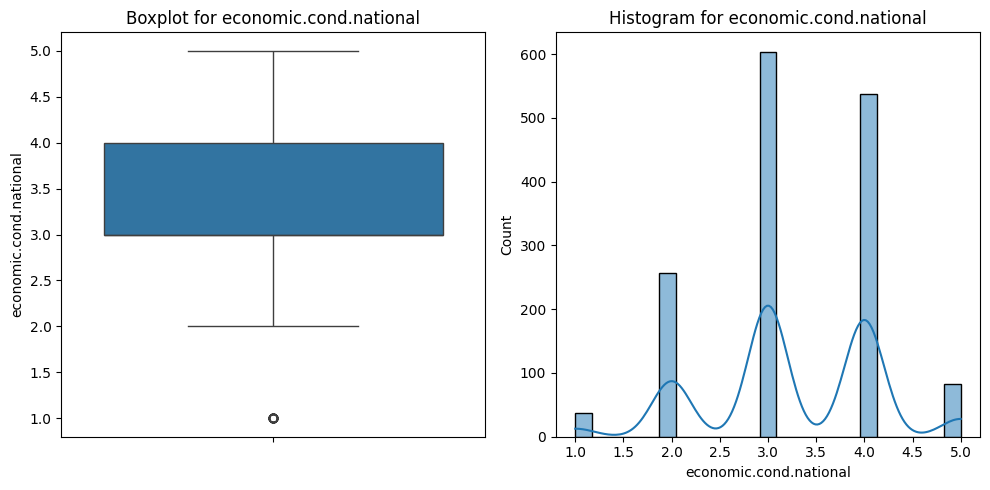

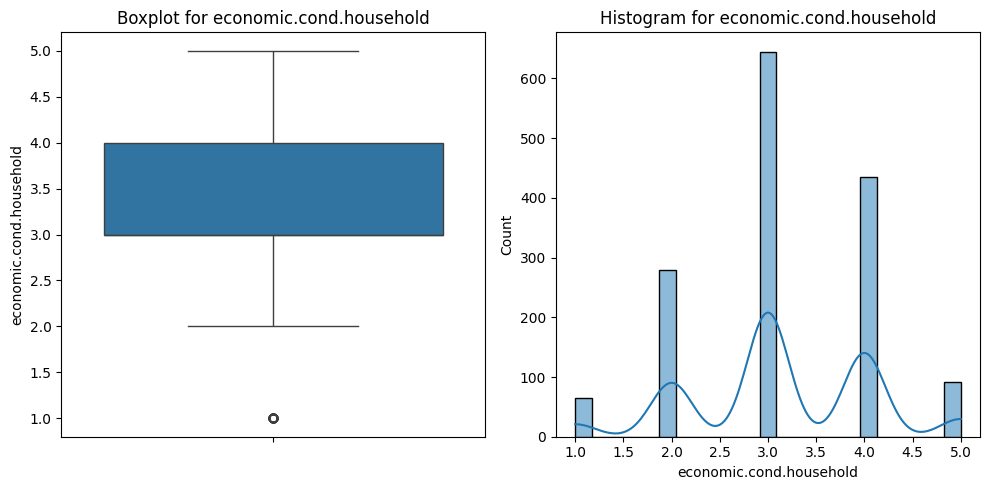

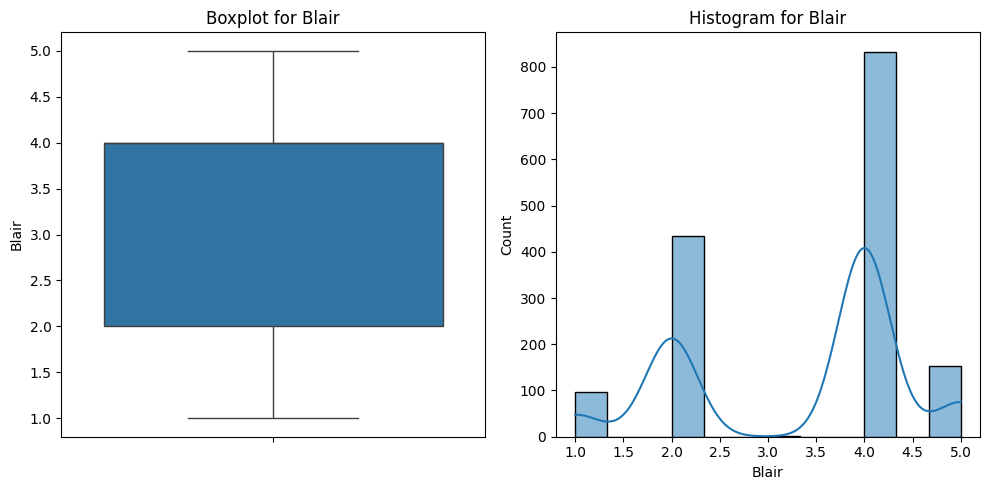

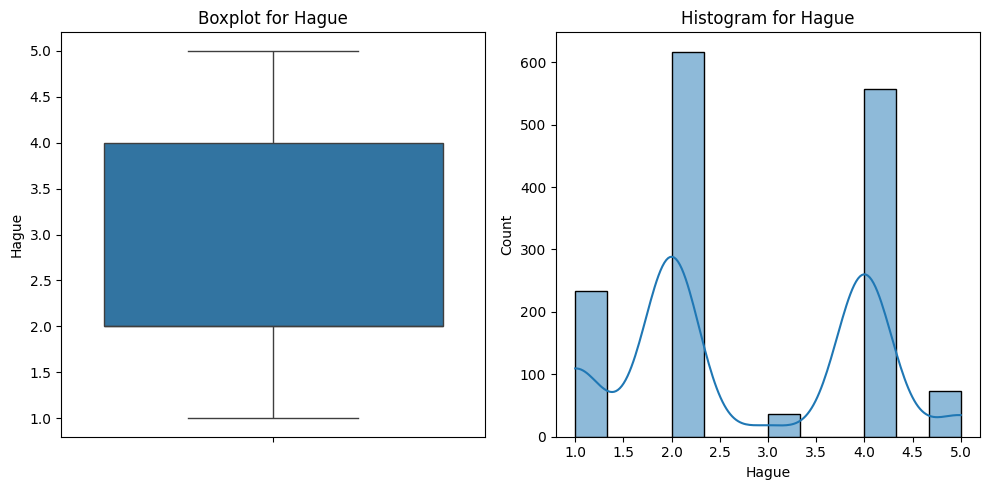

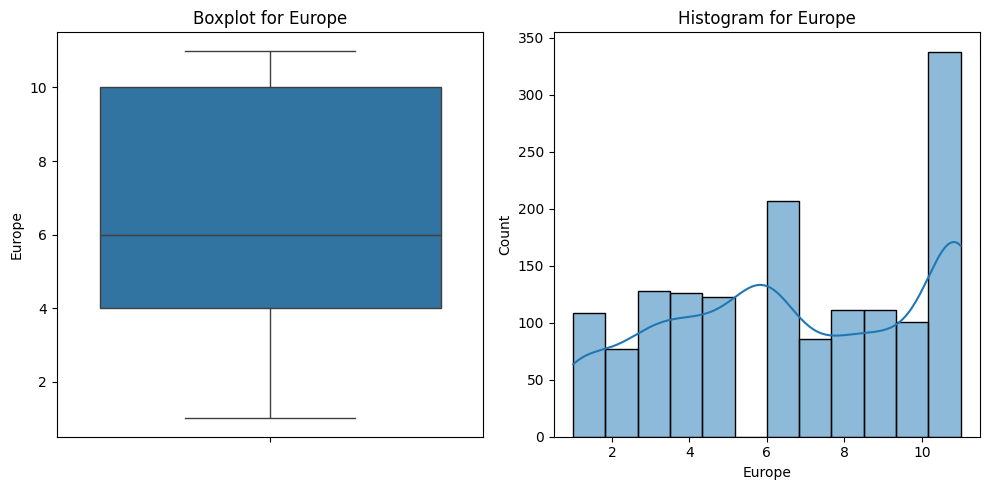

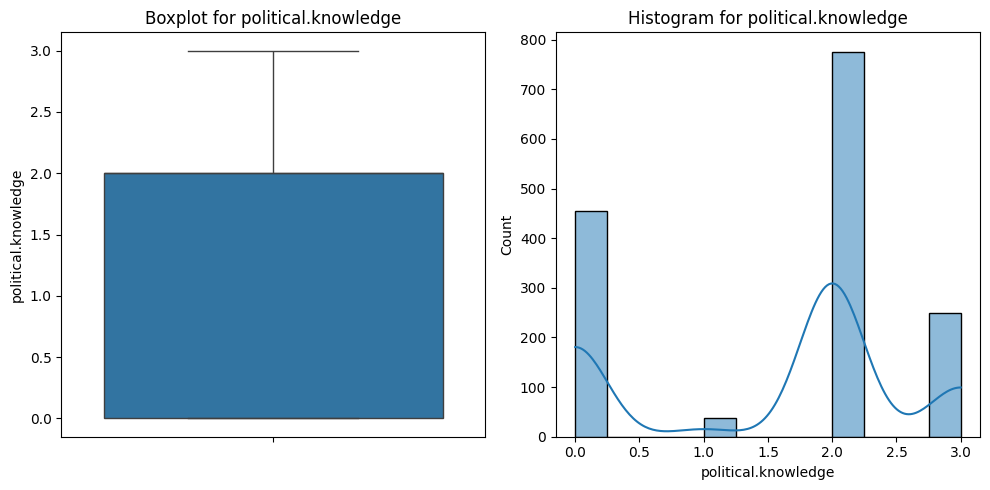

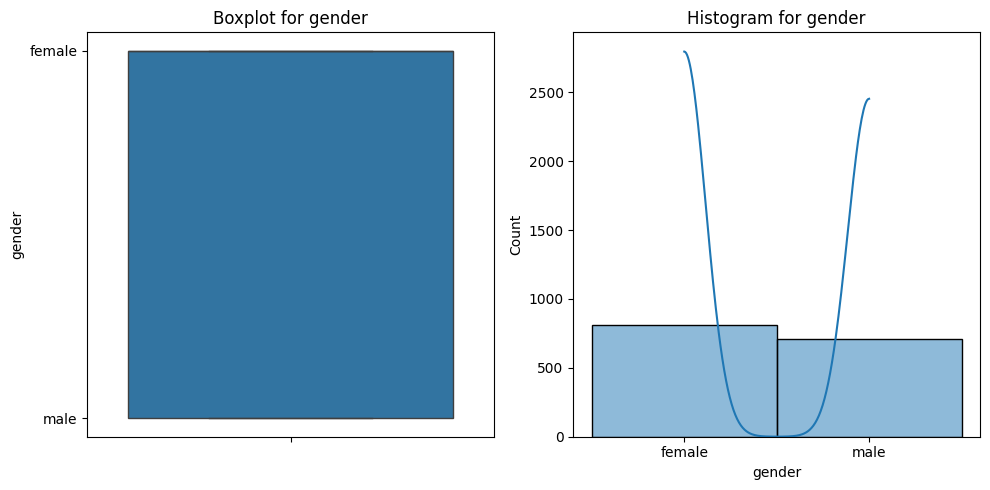

In [35]:
list_columns = df.columns
for i in range(len(list_columns)):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.subplot(1, 2, 1)  # Define the first subplot for the boxplot
    plt.title('Boxplot for {}'.format(list_columns[i]))
    sns.boxplot(y=df[list_columns[i]])  # Use 'y' to specify the vertical boxplot

    plt.subplot(1, 2, 2)  # Define the second subplot for the histogram
    plt.title('Histogram for {}'.format(list_columns[i]))
    sns.histplot(df[list_columns[i]], kde=True)  # Added KDE (Kernel Density Estimate) for smoothness

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

In [36]:
for column in df.select_dtypes(include=np.number).columns:

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1

    uplim = q3 + (1.5 * IQR)
    lowlim = q1 - (1.5 * IQR)

    df[column] = np.where(df[column] < lowlim, lowlim, df[column])
    df[column] = np.where(df[column] > uplim, uplim, df[column])

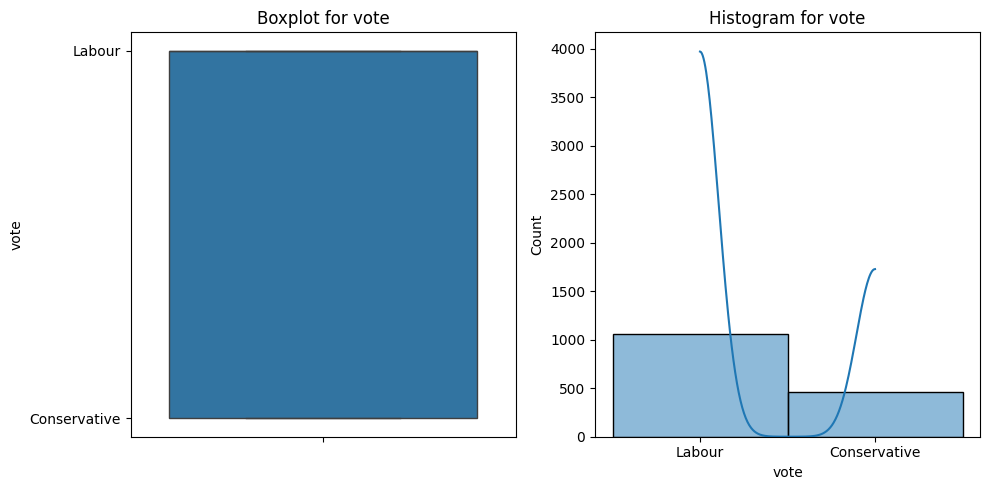

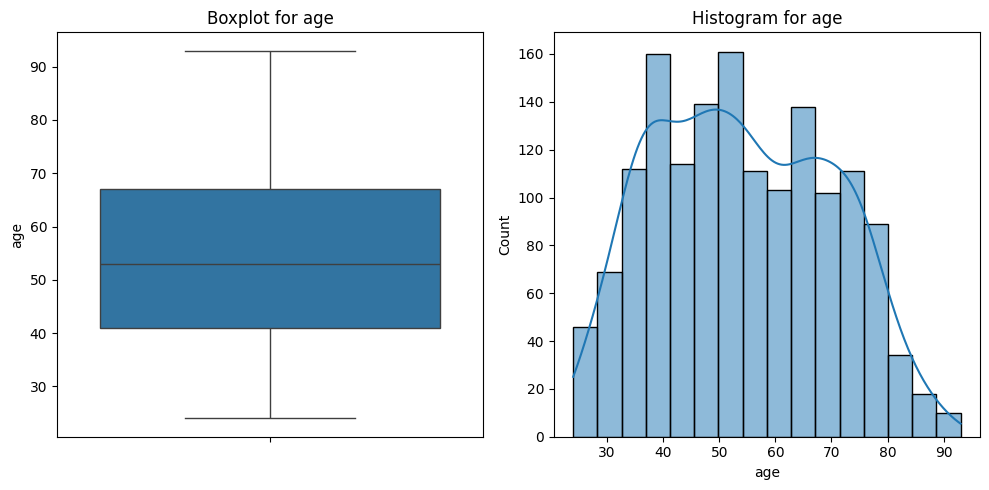

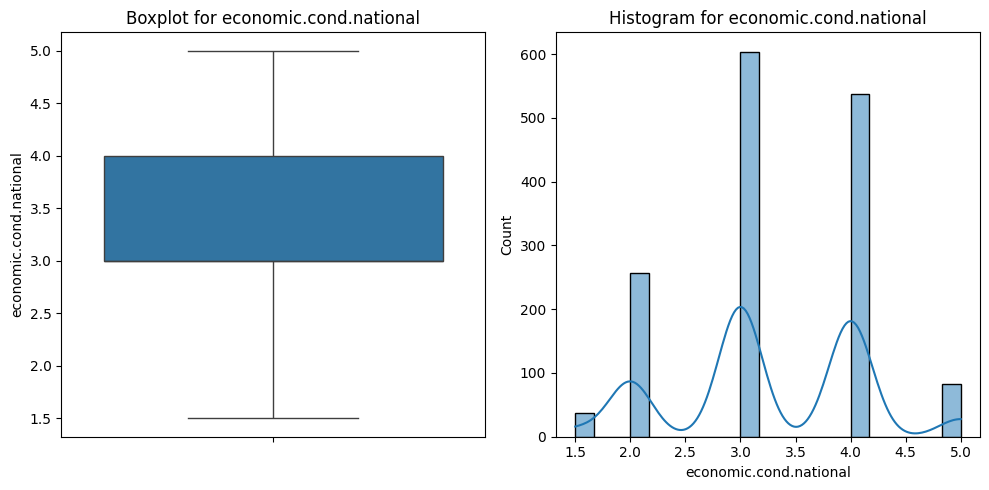

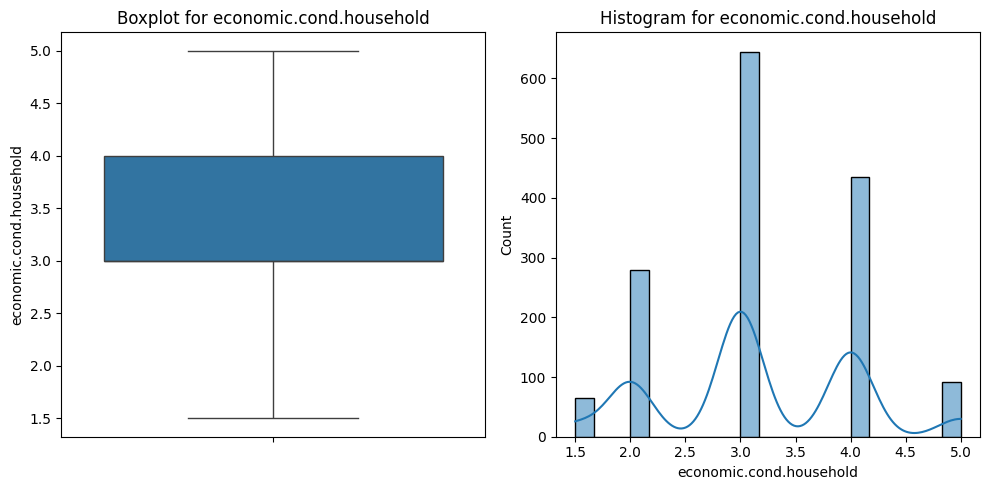

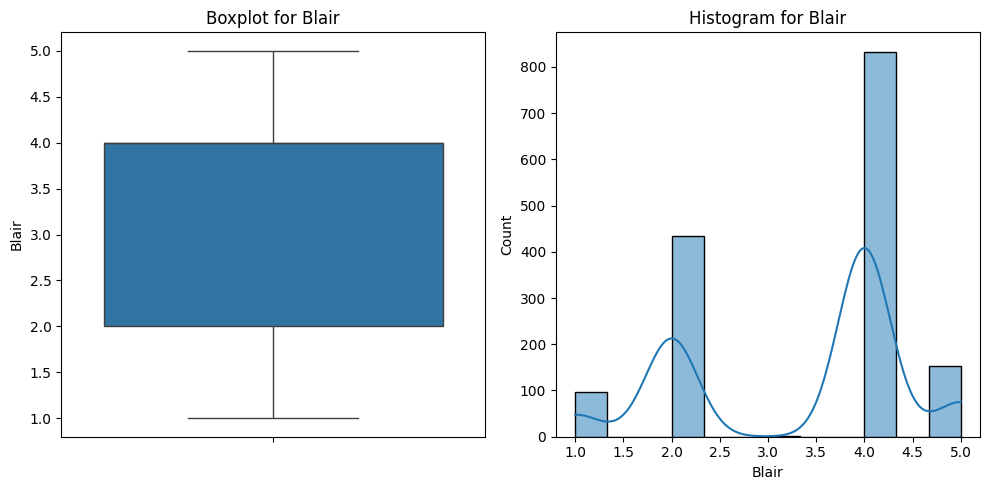

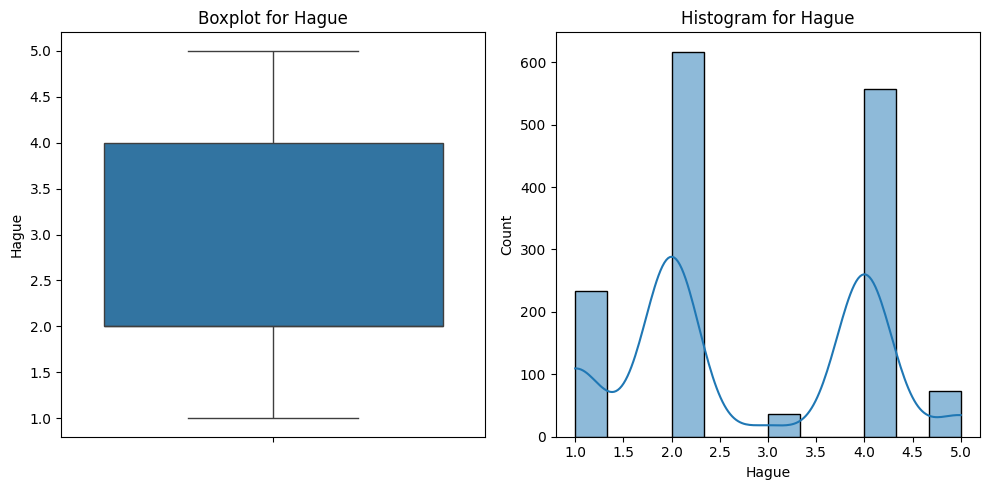

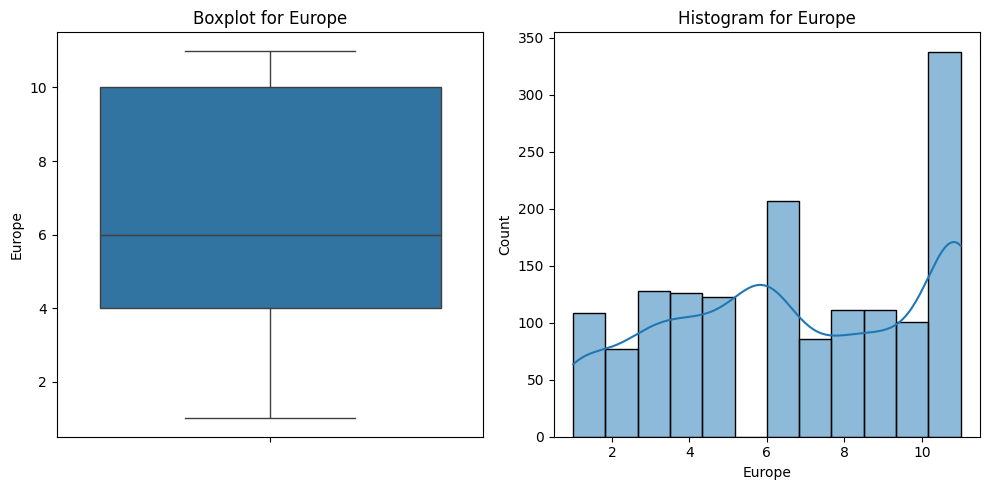

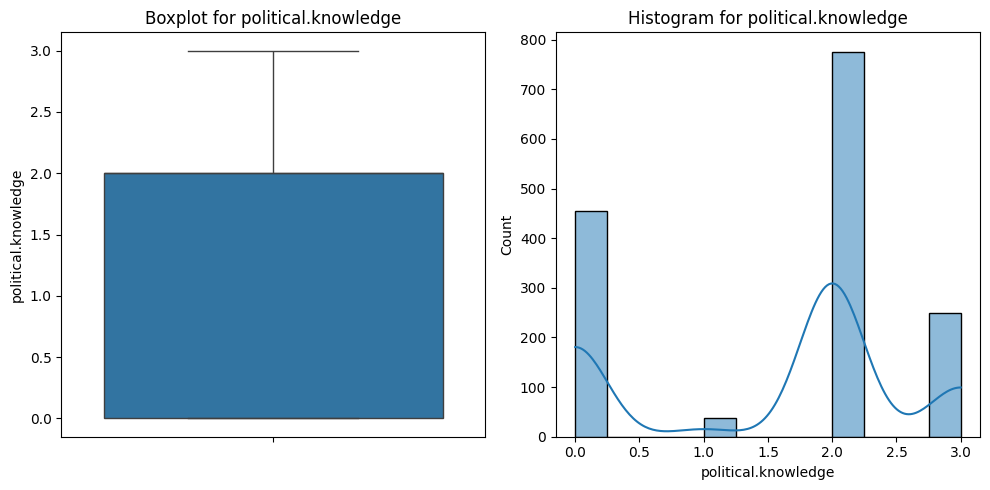

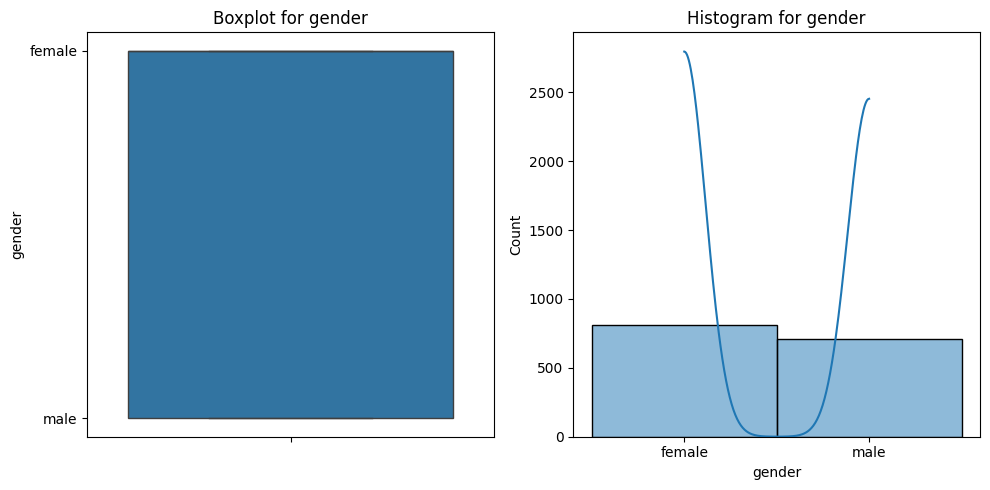

In [37]:
list_columns = df.columns
for i in range(len(list_columns)):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.subplot(1, 2, 1)  # Define the first subplot for the boxplot
    plt.title('Boxplot for {}'.format(list_columns[i]))
    sns.boxplot(y=df[list_columns[i]])  # Use 'y' to specify the vertical boxplot

    plt.subplot(1, 2, 2)  # Define the second subplot for the histogram
    plt.title('Histogram for {}'.format(list_columns[i]))
    sns.histplot(df[list_columns[i]], kde=True)  # Added KDE (Kernel Density Estimate) for smoothness

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

### Encoding

In [38]:
df['vote'] = df['vote'].map({'Labour':0, 'Conservative':1})
df['gender'] = df['gender'].map({'male':0, 'female':1})

In [39]:
df.head()

vote   age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     0  43.0                     3.0                      3.0    4.0    1.0   
1     0  36.0                     4.0                      4.0    4.0    4.0   
2     0  35.0                     4.0                      4.0    5.0    2.0   
3     0  24.0                     4.0                      2.0    2.0    1.0   
4     0  41.0                     2.0                      2.0    1.0    1.0   

   Europe  political.knowledge  gender  
0     2.0                  2.0       1  
1     5.0                  2.0       0  
2     3.0                  2.0       0  
3     4.0                  0.0       1  
4     6.0                  2.0       0

In [40]:
X = df.drop(['vote'], axis=1)
y = df['vote']

In [41]:
X.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  43.0                     3.0                      3.0    4.0    1.0   
1  36.0                     4.0                      4.0    4.0    4.0   
2  35.0                     4.0                      4.0    5.0    2.0   
3  24.0                     4.0                      2.0    2.0    1.0   
4  41.0                     2.0                      2.0    1.0    1.0   

   Europe  political.knowledge  gender  
0     2.0                  2.0       1  
1     5.0                  2.0       0  
2     3.0                  2.0       0  
3     4.0                  0.0       1  
4     6.0                  2.0       0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [43]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [44]:
X_train_sc_df =pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_sc_df.head()

age  economic.cond.national  economic.cond.household     Blair  \
0 -1.296710               -1.518921                 0.923619 -2.018037   
1 -0.910337                0.892714                -0.196335  0.550300   
2  0.441968                0.892714                -0.196335  0.550300   
3 -0.459569               -0.313103                -0.196335  0.550300   
4 -0.652755                2.098531                -0.196335  0.550300   

      Hague    Europe  political.knowledge    gender  
0  1.029070  1.332089             0.452231  0.936950  
1  1.029070 -0.202156            -1.407526 -1.067292  
2  1.029070  0.104693             0.452231  0.936950  
3 -0.593283  1.332089            -1.407526 -1.067292  
4 -0.593283  0.411542            -1.407526 -1.067292

In [45]:
X_test_sc_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_sc_df.head()

age  economic.cond.national  economic.cond.household     Blair  \
0  1.085923               -0.313103                -0.196335 -1.161925   
1 -0.717151               -0.313103                -1.316288  0.550300   
2  2.245042                2.098531                 2.043572  1.406413   
3 -0.459569               -1.518921                -0.196335 -1.161925   
4 -1.361106                2.098531                 0.923619  0.550300   

      Hague    Europe  political.knowledge    gender  
0 -0.593283  0.411542             0.452231  0.936950  
1 -0.593283  0.411542             1.382110 -1.067292  
2 -0.593283 -1.736401             0.452231 -1.067292  
3  1.029070  0.411542             0.452231  0.936950  
4  1.029070  0.411542            -1.407526 -1.067292

In [46]:
# KNN for unscaled data
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_model3 = knn.fit(X_train,y_train)
# evaluate accuracy
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_model3.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model3.score(X_test, y_test))


# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_model5 = knn.fit(X_train,y_train)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_model5.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model5.score(X_test, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_model7 =knn.fit(X_train,y_train)
#print("Accuracy Score for K=7 is ", knn_model.score(X_test, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_model7.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model7.score(X_test, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn_model9 = knn.fit(X_train,y_train)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_model9.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model9.score(X_test, y_test))

For K = 3 -------> 
Accuracy Score for Training Data is:  0.8699340245051838
Accuracy Score for Test Data is:  0.7850877192982456

For K = 5 -------> 
Accuracy Score for Training Data is:  0.8605089538171536
Accuracy Score for Test Data is:  0.8223684210526315

For K = 7 -------> 
Accuracy Score for Training Data is:  0.8463713477851084
Accuracy Score for Test Data is:  0.8223684210526315

For K = 9 -------> 
Accuracy Score for Training Data is:  0.8482563619227145
Accuracy Score for Test Data is:  0.8135964912280702


In [47]:
# KNN with scaled data
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_model_sc3 = knn.fit(X_train_sc_df,y_train)
# evaluate accuracy
#print("Accuracy Score for K=3 is ", knn_model.score(X_test_sc_df, y_test))
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc3.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc3.score(X_test_sc_df, y_test))

# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_model_sc5 = knn.fit(X_train_sc_df,y_train)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test_sc_df, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc5.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc5.score(X_test_sc_df, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_model_sc7 =knn.fit(X_train_sc_df,y_train)
#print("Accuracy Score for K=9 is ", knn_model.score(X_test_sc_df, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc7.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc7.score(X_test_sc_df, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors = 9, metric='euclidean')
knn_model_sc9 =knn.fit(X_train_sc_df,y_train)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_model_sc9.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", knn_model_sc9.score(X_test_sc_df, y_test))

For K = 3 -------> 
Accuracy Score for Training Data is:  0.8718190386427899
Accuracy Score for Test Data is:  0.8048245614035088

For K = 5 -------> 
Accuracy Score for Training Data is:  0.8548539114043355
Accuracy Score for Test Data is:  0.8245614035087719

For K = 7 -------> 
Accuracy Score for Training Data is:  0.8539114043355325
Accuracy Score for Test Data is:  0.8179824561403509

For K = 9 -------> 
Accuracy Score for Training Data is:  0.8444863336475024
Accuracy Score for Test Data is:  0.8157894736842105


Accuracy is Better with scaled data for KNN classifier.

Here K=5 is giving Better Accuracy.
validness of models (over fitting or under fitting):

The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.

In [48]:
knn_clf_sc = KNeighborsClassifier()
knn_clf_sc.fit(X_train_sc_df,y_train)

KNeighborsClassifier()

Model tuning is implemented for the main purpose of obtaining the highest possible accuracy in machine learning, which in turn helps in making the most optimized business decisions.
The main reason of using Hyper-parameters is to increase the performance of oue model.

In [49]:
knn_grid = {'n_neighbors': list(range(1,10)),'weights':['uniform', 'distance'],
            'metric':['minkowski','euclidean']}
grid_search_knn = GridSearchCV(estimator=knn_clf_sc,param_grid=knn_grid,cv=10)
grid_search_knn.fit(X_train_sc_df,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [50]:
print(grid_search_knn.best_params_)


{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}


In [51]:
print(grid_search_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


In [52]:
best_model_knn = grid_search_knn.best_estimator_

In [53]:
grid_search_knn.cv_results_['mean_test_score']

array([0.75872862, 0.75872862, 0.78514371, 0.75872862, 0.80020279,
       0.79361665, 0.79455123, 0.78889085, 0.81057133, 0.80774114,
       0.80679774, 0.80584553, 0.81622289, 0.81150591, 0.80679774,
       0.8124493 , 0.80773232, 0.80772351, 0.75872862, 0.75872862,
       0.78514371, 0.75872862, 0.80020279, 0.79361665, 0.79455123,
       0.78889085, 0.81057133, 0.80774114, 0.80679774, 0.80584553,
       0.81622289, 0.81150591, 0.80679774, 0.8124493 , 0.80773232,
       0.80772351])

In [54]:
print("Accuracy Score for Training Data is: ", best_model_knn.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", best_model_knn.score(X_test_sc_df, y_test))

Accuracy Score for Training Data is:  0.8539114043355325
Accuracy Score for Test Data is:  0.8179824561403509


The model is slightly Overfit.

In [55]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc_df, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_sc_df, y_test)
    ac_scores.append(scores)

# changing to misclassification error
print("Misclassification Error")
MCE = [1 - x for x in ac_scores]
MCE

Misclassification Error


[0.2171052631578947,
 0.19517543859649122,
 0.17543859649122806,
 0.18201754385964908,
 0.1842105263157895,
 0.17324561403508776,
 0.17763157894736847,
 0.16666666666666663,
 0.16666666666666663,
 0.17543859649122806]

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

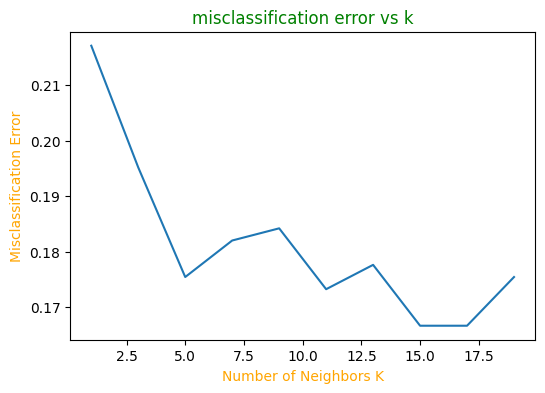

In [56]:
plt.figure(figsize=(6,4))
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.title("misclassification error vs k",color='green')
plt.xlabel('Number of Neighbors K',color = 'orange')
plt.ylabel('Misclassification Error',color='orange')
plt.show()

Taking K=5

In [57]:
print("Accuracy of Training Data: ",knn_model_sc5.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",knn_model_sc5.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8548539114043355
Accuracy of Test Data:  0.8245614035087719


In [58]:
ytrain_pred = knn_model_sc5.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.77      0.70      0.74       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [59]:
ytest_pred = knn_model_sc5.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.71      0.73       153

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [60]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

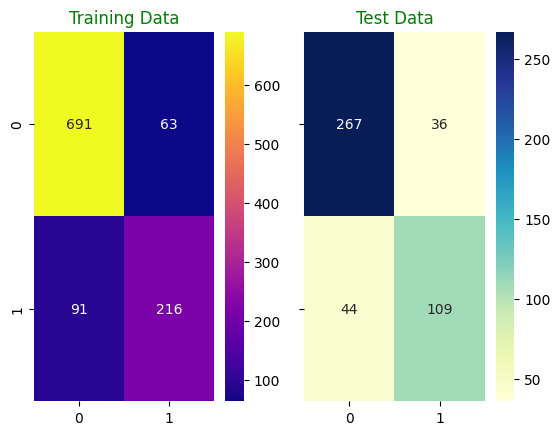

In [61]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.929


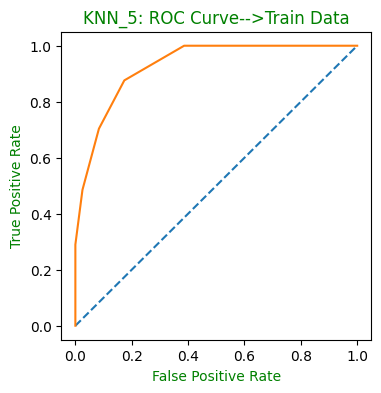

In [62]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model_sc5.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_5: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.866


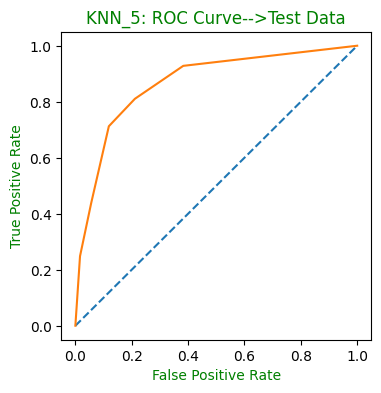

In [63]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model_sc5.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_5: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

In [64]:
print("Accuracy Score for Training Data is: ", best_model_knn.score(X_train_sc_df, y_train))
print("Accuracy Score for Test Data is: ", best_model_knn.score(X_test_sc_df, y_test))

Accuracy Score for Training Data is:  0.8539114043355325
Accuracy Score for Test Data is:  0.8179824561403509


AUC-ROC after n-classifier we did in the begining of KNN model creation

the auc curve 0.904 


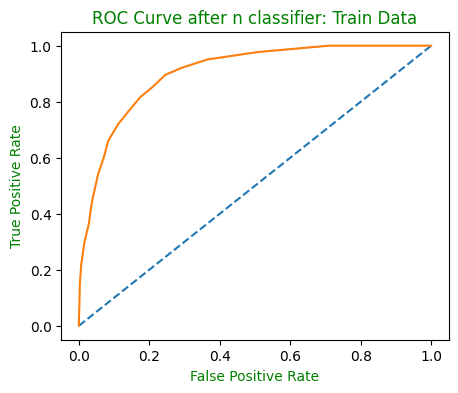

In [65]:
plt.figure(figsize=(5,4))
probs_train=knn.predict_proba(X_train_sc_df)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title("ROC Curve after n classifier: Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr, train_tpr)
plt.show()

the auc curve 0.888 


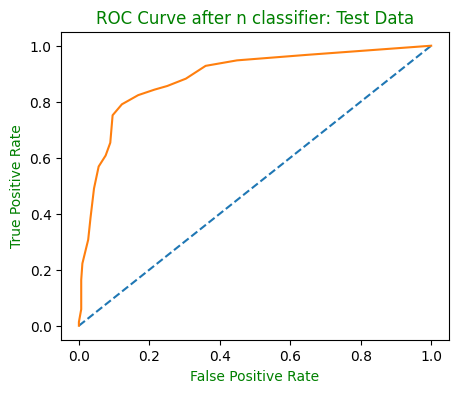

In [66]:
plt.figure(figsize=(5,4))
probs_test=knn.predict_proba(X_test_sc_df)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')

plt.title("ROC Curve after n classifier: Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr, test_tpr)
plt.show()

Taking K=16

In [67]:
knn_clf_16 = KNeighborsClassifier(n_neighbors=16)
knn_clf_16.fit(X_train_sc_df,y_train)
print("Accuracy of Train data: ",knn_clf_16.score(X_train_sc_df,y_train))
print("Accuracy of Test data: ",knn_clf_16.score(X_test_sc_df,y_test))

Accuracy of Train data:  0.8360037700282752
Accuracy of Test data:  0.8223684210526315


In [68]:
print("Accuracy of Training Data: ",knn_clf_16.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",knn_clf_16.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8360037700282752
Accuracy of Test Data:  0.8223684210526315


In [69]:
ytrain_pred = knn_clf_16.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [70]:
ytest_pred = knn_clf_16.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       303
           1       0.80      0.63      0.71       153

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [71]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

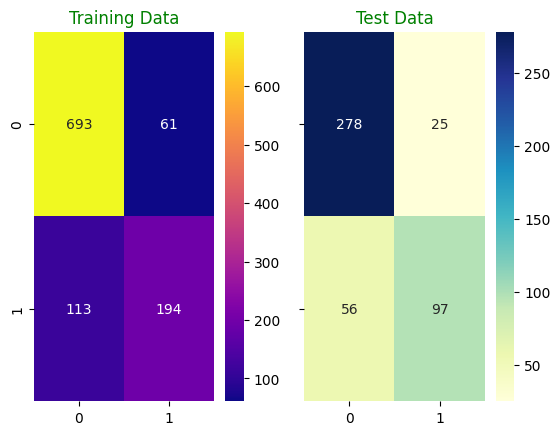

In [72]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.905


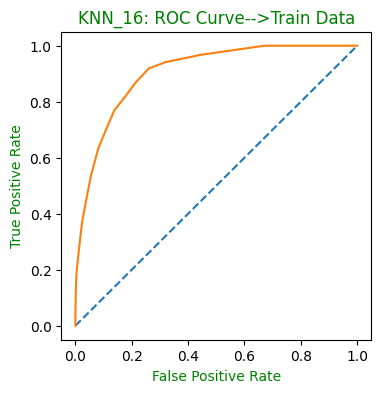

In [73]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_clf_16.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_16: ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.887


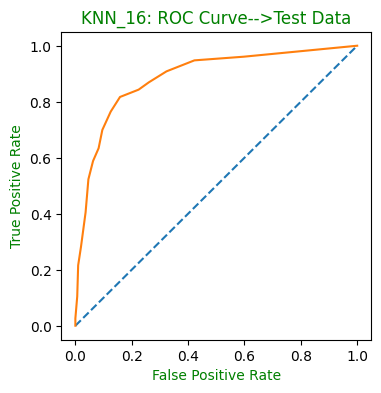

In [74]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_clf_16.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_16: ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

The accuracy of Train and Test for the above are same hence our model is neither overfit nor underfit

Taking K value as per our Grid search hypertuning parameters.

In [75]:
print("Accuracy of Training Data: ",best_model_knn.score(X_train_sc_df,y_train))
print("Accuracy of Test Data: ",best_model_knn.score(X_test_sc_df,y_test))

Accuracy of Training Data:  0.8539114043355325
Accuracy of Test Data:  0.8179824561403509


In [76]:
ytrain_pred = best_model_knn.predict(X_train_sc_df)
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.77      0.71      0.74       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [77]:
ytest_pred = best_model_knn.predict(X_test_sc_df)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       303
           1       0.73      0.72      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [78]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

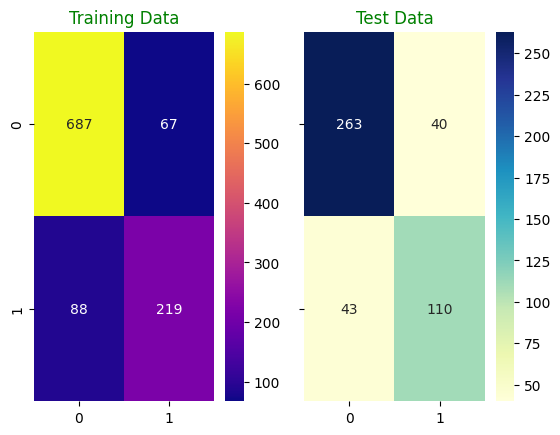

In [79]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.920


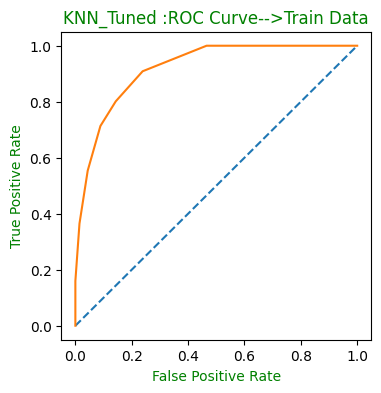

In [80]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_knn.predict_proba(X_train_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_Tuned :ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.881


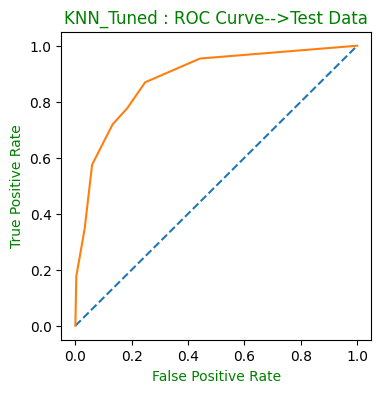

In [81]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_knn.predict_proba(X_test_sc_df)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("KNN_Tuned : ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

### Naive Bayes

In [82]:
NB = GaussianNB()
NB_model = NB.fit(X_train,y_train)

In [83]:
print("Accuracy Score for Training Data is: ", NB_model.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", NB_model.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8341187558906692
Accuracy Score for Test Data is:  0.8223684210526315


In [84]:
ytrain_pred = NB_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = NB_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       754
           1       0.72      0.69      0.71       307

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [85]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

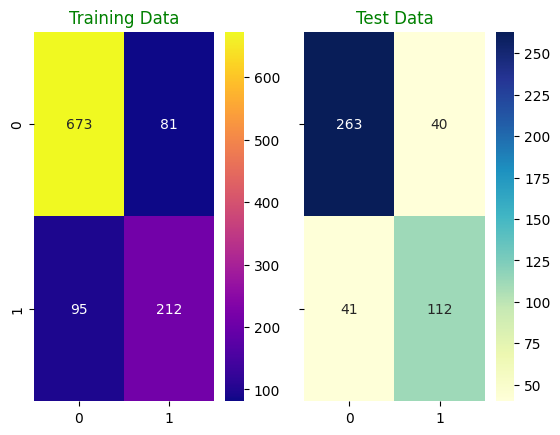

In [86]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.889


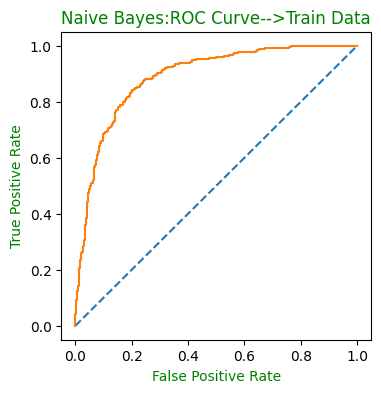

In [87]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Naive Bayes:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.876


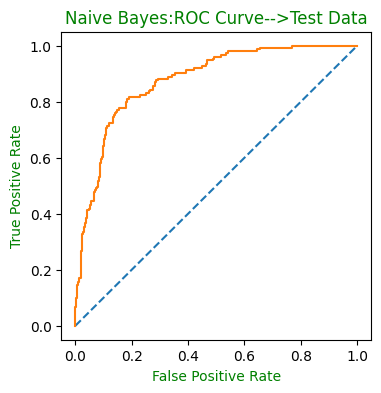

In [88]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Naive Bayes:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit for Naive Bayes.

In [89]:
a = knn_model_sc5.score(X_train_sc_df, y_train)
b = knn_model_sc5.score(X_test_sc_df, y_test)
c = NB_model.score(X_train,y_train)
d = NB_model.score(X_test,y_test)


In [90]:
# pd.DataFrame()
data = {'KNN':[a,b] ,'Naive_Bayes':[c,d]}
pd.DataFrame(data=data,  index=['Train_Accuracy','Test_Accuracy'])

KNN  Naive_Bayes
Train_Accuracy  0.854854     0.834119
Test_Accuracy   0.824561     0.822368

Conclusions:

The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.
Naive bayes model is slightly less overfit than KNN model but there would not be much difference in there prediction.

### Random Forest

(Due high consumption of time to run the search grid this method is dropped instead we will use CARTS method for bagging and boosting.
It took 7 hrs just to do a grid search on google colab and on jupyter notebook it just crashes my computer for random forest.
I am leaving the code lines for anyone who wants to see the output as it did work it just it takes a lot of time to run it.)

In [91]:
# RF_model = RandomForestClassifier(n_estimators=100, random_state=1)
# RF_model.fit(X_train,y_train)
# print("Accuracy on Train data: ",RF_model.score(X_train,y_train))
# print("Accuracy on Test data: ",RF_model.score(X_test,y_test))

In [92]:
# Param_grid = {
#               'min_samples_split' : [10,20,30,40,50],
#               'min_samples_leaf':[5,10,15,20],
#               'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2", None],
#               'n_estimators':[50,100,150]
#              }

In [93]:
# grid_search = GridSearchCV(estimator=RF_model,param_grid=Param_grid,cv=10)
# grid_search.fit(X_train,y_train)

In [94]:
# print(grid_search.best_params_,"\n")
# print(grid_search.best_estimator_)

In [95]:
# best_modelRF = grid_search.best_estimator_

In [96]:
# best_modelRF.fit(X_train,y_train)

In [97]:
# print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
# print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

In [98]:
# print("Accuracy on Train data: ",RF_model.score(X_train,y_train))
# print("Accuracy on Test data: ",RF_model.score(X_test,y_test))

In [99]:
# ytrain_pred = RF_model.predict(X_train)
# print(classification_report(y_train,ytrain_pred))

In [100]:
# ytest_pred = RF_model.predict(X_test)
# print(classification_report(y_test,ytest_pred))

In [101]:
# cm = confusion_matrix(y_train,ytrain_pred)
# cm1 = confusion_matrix(y_test,ytest_pred)

In [102]:
# fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

# #Plotting confusion matrix for the different models for the Training Data
# plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
# a[0][0].set_title('Training Data',color='green')

# #Plotting confusion matrix for the different models for the Test Data
# plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
# a[0][1].set_title('Test Data',color='green');

In [103]:
# plt.figure(figsize=(4,4))
# # predict probabilities
# probs = RF_model.predict_proba(X_train)
# # keep probabilities for the positive outcome only
# probs = probs[:,1]
# # calculate AUC
# auc = roc_auc_score(y_train,probs)
# print("AUC: %.3f" %auc)
# # calculate roc curve
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
# plt.plot([0,1], [0,1], linestyle='--')
# # plot the roc curve for the model
# plt.title("RF: ROC Curve-->Train Data",color='green')
# plt.xlabel('False Positive Rate',color='green')
# plt.ylabel('True Positive Rate' ,color='green')
# plt.plot(train_fpr,train_tpr);

In [104]:
# plt.figure(figsize=(4,4))
# # predict probabilities
# probs = RF_model.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# probs = probs[:,1]
# # calculate AUC
# test_auc = roc_auc_score(y_test,probs)
# print('AUC: %.3f' % test_auc)
# # calculate roc curve
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
# plt.plot([0,1], [0,1], linestyle='--')
# # plot the roc curve for the model
# plt.title("RF: ROC Curve-->Test Data",color='green')
# plt.xlabel('False Positive Rate',color='green')
# plt.ylabel('True Positive Rate' ,color='green')
# plt.plot(test_fpr,test_tpr);

In [105]:
# print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
# print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

In [106]:
# ytrain_pred = best_modelRF.predict(X_train)
# print(classification_report(y_train,ytrain_pred))

In [107]:
# ytest_pred = best_modelRF.predict(X_test)
# print(classification_report(y_test,ytest_pred))

In [108]:
# cm = confusion_matrix(y_train,ytrain_pred)
# cm1 = confusion_matrix(y_test,ytest_pred)

In [109]:
# fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

# #Plotting confusion matrix for the different models for the Training Data
# plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
# a[0][0].set_title('Training Data',color='green')

# #Plotting confusion matrix for the different models for the Test Data
# plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
# a[0][1].set_title('Test Data',color='green');

In [110]:
# plt.figure(figsize=(4,4))
# # predict probabilities
# probs = best_modelRF.predict_proba(X_train)
# # keep probabilities for the positive outcome only
# probs = probs[:,1]
# # calculate AUC
# auc = roc_auc_score(y_train,probs)
# print("AUC: %.3f" %auc)
# # calculate roc curve
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
# plt.plot([0,1], [0,1], linestyle='--')
# # plot the roc curve for the model
# plt.title("RF_Tuned:ROC Curve-->Train Data",color='green')
# plt.xlabel('False Positive Rate',color='green')
# plt.ylabel('True Positive Rate' ,color='green')
# plt.plot(train_fpr,train_tpr);

In [111]:
# plt.figure(figsize=(4,4))
# # predict probabilities
# probs = best_modelRF.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# probs = probs[:,1]
# # calculate AUC
# test_auc = roc_auc_score(y_test,probs)
# print('AUC: %.3f' % test_auc)
# # calculate roc curve
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
# plt.plot([0,1], [0,1], linestyle='--')
# # plot the roc curve for the model
# plt.title("RF_Tuned:ROC Curve-->Test Data",color='green')
# plt.xlabel('False Positive Rate',color='green')
# plt.ylabel('True Positive Rate' ,color='green')
# plt.plot(test_fpr,test_tpr);

### CARTS Decision Tree creation for BAGGING Method.

In [112]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [113]:
from sklearn import tree
from sklearn.pipeline import Pipeline

train_char_label = ['No', 'Yes']
Tree_File = open('C:\\Users\Harsh Patel\Desktop\Tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()

In [114]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
age                      0.213733
economic.cond.national   0.104742
economic.cond.household  0.080628
Blair                    0.126848
Hague                    0.226037
Europe                   0.145015
political.knowledge      0.065019
gender                   0.037978


In [115]:
y_predict = dTree.predict(X_test)

Since we are creating Decision tree to use if for Bagging method we do not have create a pruned decision tree as overfit decision tree will give better performce for the Bagging.

### Bagging Method

In [126]:
bgcl_rf = BaggingClassifier(base_estimator=dTree,n_estimators=100,max_samples=.50,random_state=1)
bgcl_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_samples=0.5, n_estimators=100, random_state=1)

In [127]:
print("Accuracy on Train data: ",bgcl_rf.score(X_train,y_train))
print("Accuracy on Test Data: ",bgcl_rf.score(X_test,y_test))

Accuracy on Train data:  0.9509896324222432
Accuracy on Test Data:  0.8289473684210527


In [128]:
ytrain_pred = bgcl_rf.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = bgcl_rf.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       754
           1       0.96      0.87      0.91       307

    accuracy                           0.95      1061
   macro avg       0.95      0.93      0.94      1061
weighted avg       0.95      0.95      0.95      1061

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.69      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



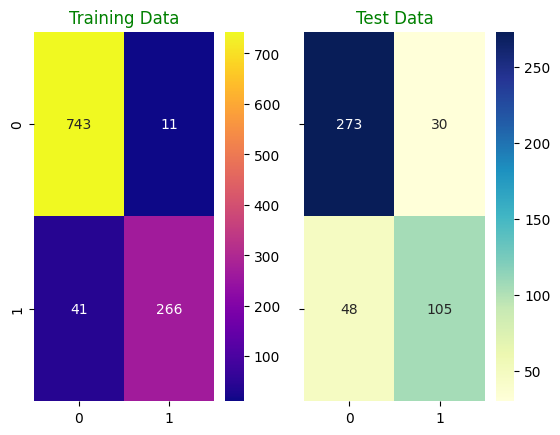

In [129]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.994


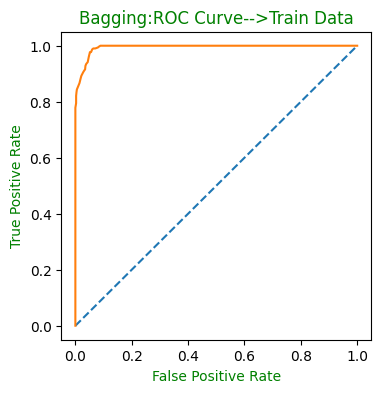

In [130]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Bagging:ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.890


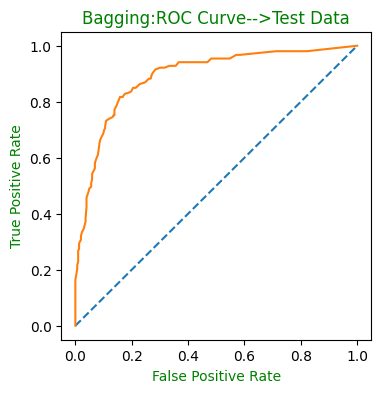

In [131]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Bagging:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

### ADABOOSTING

In [132]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [133]:
print("Accuracy on Train Data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_model.score(X_test,y_test))

Accuracy on Train Data:  0.8501413760603205
Accuracy on Test Data:  0.8135964912280702


In [134]:
Param_grid = { 'n_estimators' : [50,100,500,1000],
               'learning_rate' : [0.1,0.01,0.001,1.0],
               'algorithm' : ['SAMME', 'SAMME.R']
             }

In [135]:
grid_search = GridSearchCV(estimator=ADB_model,param_grid=Param_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(n_estimators=100, random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 1.0],
                         'n_estimators': [50, 100, 500, 1000]})

In [136]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1000} 

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000,
                   random_state=1)


In [137]:
best_model_Adb = grid_search.best_estimator_
best_model_Adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000,
                   random_state=1)

In [138]:
print("Accuracy on Train Data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_Adb.score(X_test,y_test))

Accuracy on Train Data:  0.8378887841658812
Accuracy on Test Data:  0.8135964912280702


In [139]:
print("Accuracy on Train data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test data: ",ADB_model.score(X_test,y_test))

Accuracy on Train data:  0.8501413760603205
Accuracy on Test data:  0.8135964912280702


In [140]:
ytrain_pred = ADB_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = ADB_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



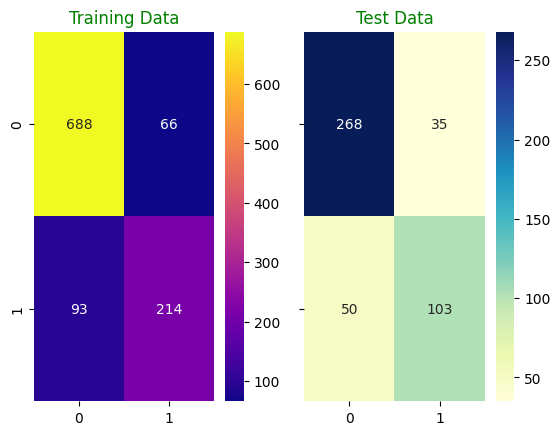

In [141]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.915


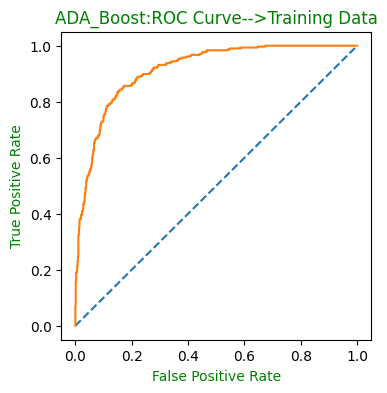

In [142]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADA_Boost:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.877


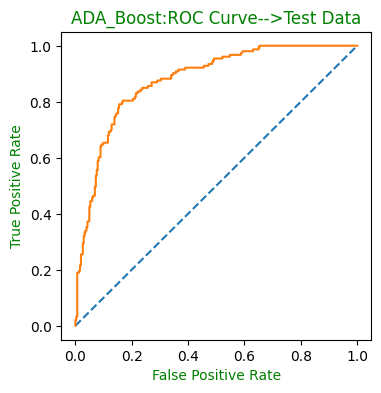

In [143]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADA_Boost:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

In [144]:
print("Accuracy on Train data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test data: ",best_model_Adb.score(X_test,y_test))

ytrain_pred = best_model_Adb.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = best_model_Adb.predict(X_test)
print(classification_report(y_test,ytest_pred))

Accuracy on Train data:  0.8378887841658812
Accuracy on Test data:  0.8135964912280702
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       754
           1       0.77      0.62      0.69       307

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



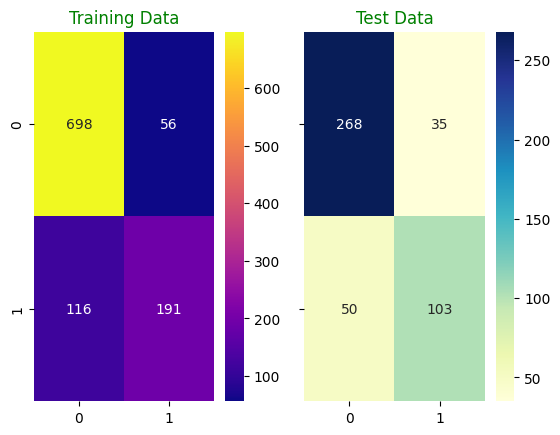

In [145]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.904


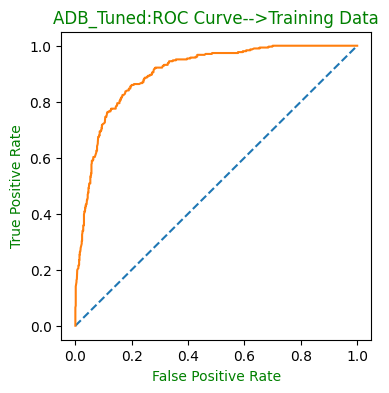

In [146]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_Adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADB_Tuned:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.887


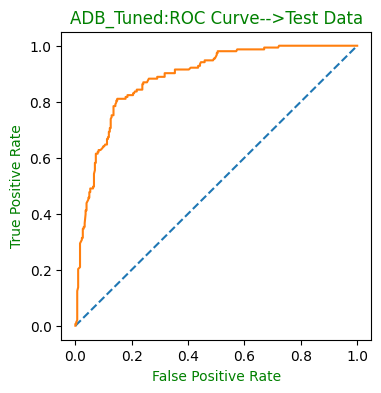

In [147]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_Adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ADB_Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

### Gradient Boosting

In [148]:
gbc_model=GradientBoostingClassifier(n_estimators=100,random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [149]:
print("Accuracy on Train Data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test Data: ",gbc_model.score(X_test,y_test))

Accuracy on Train Data:  0.8925541941564562
Accuracy on Test Data:  0.8355263157894737


In [150]:
Param_grid = {'n_estimators':[50,100,150,200],'criterion' : ['friedman_mse', 'squared_error'],
              'loss' : ['log_loss', 'exponential'],'max_features' : ['sqrt', 'log2'],
               'max_depth':[3,5],'max_leaf_nodes':[2,5]}

In [151]:
grid_search = GridSearchCV(estimator=gbc_model,param_grid=Param_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [152]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 5, 'n_estimators': 150} 

GradientBoostingClassifier(loss='exponential', max_features='log2',
                           max_leaf_nodes=5, n_estimators=150, random_state=1)


In [153]:
best_model_gdb = grid_search.best_estimator_
best_model_gdb.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', max_features='log2',
                           max_leaf_nodes=5, n_estimators=150, random_state=1)

In [154]:
print("Accuracy on Train Data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_gdb.score(X_test,y_test))

Accuracy on Train Data:  0.8803016022620169
Accuracy on Test Data:  0.8289473684210527


In [155]:
print("Accuracy on Train data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test data: ",gbc_model.score(X_test,y_test))

ytrain_pred = gbc_model.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = gbc_model.predict(X_test)
print(classification_report(y_test,ytest_pred))

Accuracy on Train data:  0.8925541941564562
Accuracy on Test data:  0.8355263157894737
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.80      0.69      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



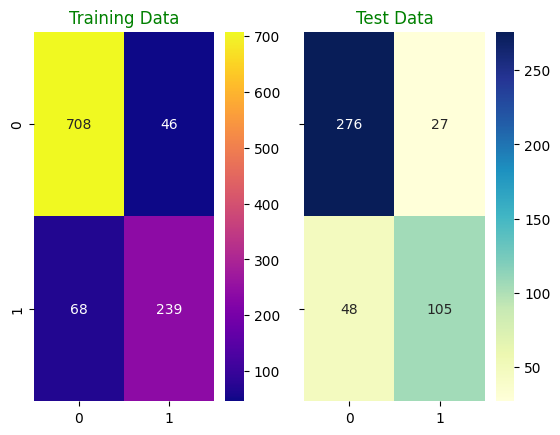

In [156]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.951


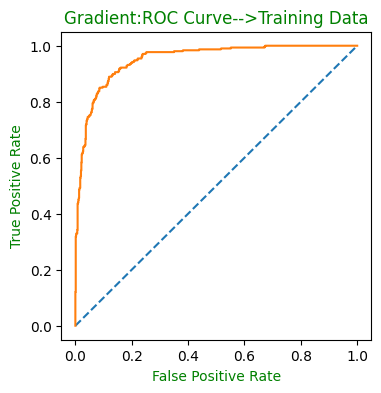

In [157]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = gbc_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Gradient:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.899


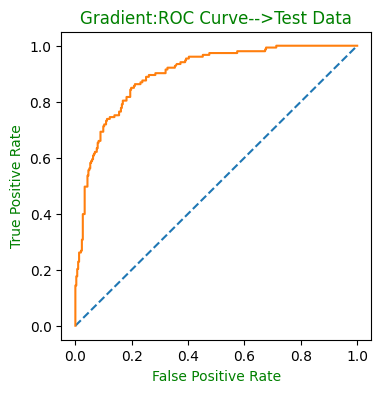

In [158]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = gbc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("Gradient:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

In [159]:
print("Accuracy on Train data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test data: ",best_model_gdb.score(X_test,y_test))

ytrain_pred = best_model_gdb.predict(X_train)
print(classification_report(y_train,ytrain_pred))

ytest_pred = best_model_gdb.predict(X_test)
print(classification_report(y_test,ytest_pred))

Accuracy on Train data:  0.8803016022620169
Accuracy on Test data:  0.8289473684210527
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.74      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       303
           1       0.77      0.69      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



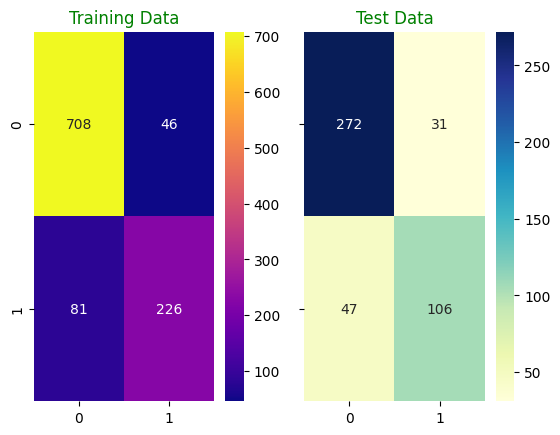

In [160]:
cm = confusion_matrix(y_train,ytrain_pred)
cm1 = confusion_matrix(y_test,ytest_pred)

fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plt_0 = sns.heatmap(cm, annot=True, fmt='.5g',cmap='plasma',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap(cm1, annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');

AUC: 0.942


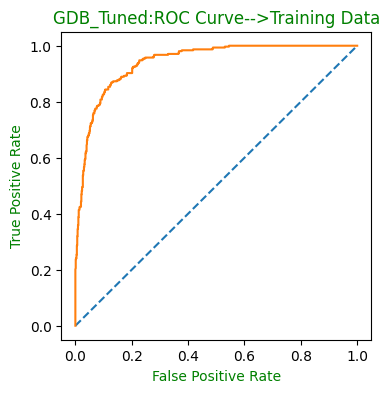

In [161]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_gdb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("GDB_Tuned:ROC Curve-->Training Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.902


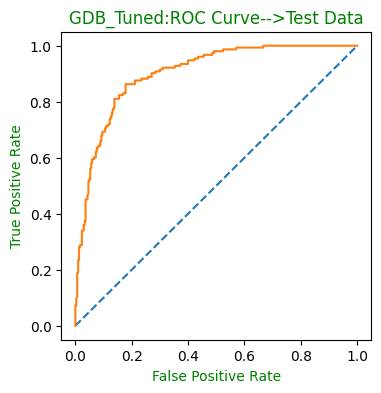

In [162]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = best_model_gdb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("GDB_Tuned:ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(test_fpr,test_tpr);

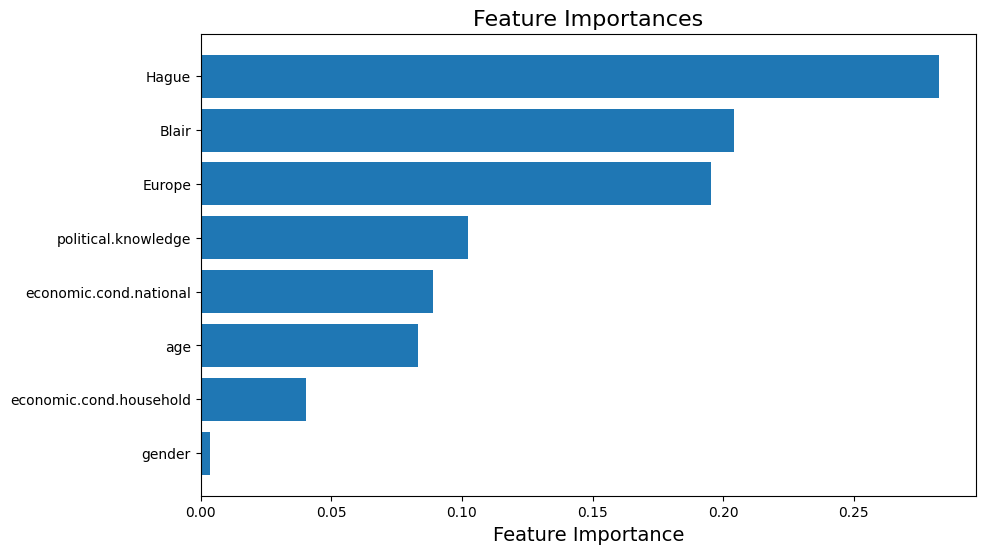

In [178]:
feature_importances =  best_model_gdb.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_features['Importance'], align='center')
plt.yticks(range(len(sorted_features)), sorted_features['Feature'])
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

Conclusion:


The accuracy of the KNN model(k=16) is same for both Train and Test data.

Hence there is no issue of overfit and underfit for KNN_16 model.

The accuracy for the Naive bayes model is also good for Train and Test data.We can say there is no overfit and underfit.

We will Reject the  Bagging classifier model as these models suffers from Overfiiting and are unreliable for predicting the results.

Of all the models, Tuned Gradient Boosting has performed better in terms of accuracy, precision,
recall and ROC-AUC curve. Although algorithms such as KNN, Naïve bayes, pruned Decision trees
and Ada-Boost have performed exceptionally well it was Tuned Gradient boosting which
outperformed rest all other good performing algorithms. However, models such as Decision trees
without pruning and bagging without tuning the parameters resulted in Overfitting and to
overcome that pruning and hyper tuning parameters were employed.

----------------------------
# PROBLEM-2:

This project focuses on analyzing inaugural speeches from Presidents of the United States. Specifically, we'll be examining speeches by President Franklin D. Roosevelt in 1941, President John F. Kennedy in 1961, and President Richard Nixon in 1973 using Python and the NLTK library.

--------------------------------

In [163]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import inaugural
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
inaugural.fileids()

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

### Finding out Characters, Words and Sentences that are common in all three speeches individually as well as all three combined.

In [164]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [165]:
# Function to count characters, words, and sentences
def count_stats(text):
    num_chars = len(text)
    words = word_tokenize(text)
    num_words = len(words)
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    return num_chars, num_words, num_sentences

In [166]:
roosevelt_chars, roosevelt_words, roosevelt_sentences = count_stats(roosevelt_speech)
kennedy_chars, kennedy_words, kennedy_sentences = count_stats(kennedy_speech)
nixon_chars, nixon_words, nixon_sentences = count_stats(nixon_speech)

In [167]:
print("Roosevelt Speech:")
print("Number of Characters:", roosevelt_chars)
print("Number of Words:", roosevelt_words)
print("Number of Sentences:", roosevelt_sentences)
print()

print("Kennedy Speech:")
print("Number of Characters:", kennedy_chars)
print("Number of Words:", kennedy_words)
print("Number of Sentences:", kennedy_sentences)
print()

print("Nixon Speech:")
print("Number of Characters:", nixon_chars)
print("Number of Words:", nixon_words)
print("Number of Sentences:", nixon_sentences)

Roosevelt Speech:
Number of Characters: 7571
Number of Words: 1526
Number of Sentences: 68

Kennedy Speech:
Number of Characters: 7618
Number of Words: 1543
Number of Sentences: 52

Nixon Speech:
Number of Characters: 9991
Number of Words: 2006
Number of Sentences: 68


### TEXT CLEANING

In [168]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [169]:
def preprocess(text):
    words = word_tokenize(text)
    filtered_words = [stemmer.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return filtered_words

In [170]:
# Preprocess speeches
roosevelt_words = preprocess(roosevelt_speech)
kennedy_words = preprocess(kennedy_speech)
nixon_words = preprocess(nixon_speech)

In [171]:
# Count word frequencies
roosevelt_freq = Counter(roosevelt_words)
kennedy_freq = Counter(kennedy_words)
nixon_freq = Counter(nixon_words)

In [172]:
print("The 3 most common words in Roosevelt speech are",roosevelt_freq.most_common(3))
print("The 3 most common words in Kennedy speech are",kennedy_freq.most_common(3))
print("The 3 most common words in Nixon speech are",nixon_freq.most_common(3))

The 3 most common words in Roosevelt speech are [('nation', 17), ('know', 10), ('peopl', 9)]
The 3 most common words in Kennedy speech are [('let', 16), ('us', 12), ('power', 9)]
The 3 most common words in Nixon speech are [('us', 26), ('let', 22), ('america', 21)]


In [173]:
# Combine all word frequencies
combined_freq = roosevelt_freq + kennedy_freq + nixon_freq

# Get the three most common words
common_words = combined_freq.most_common(3)

print("Three most common words in all three speeches after preprocessing:")
for word, freq in common_words:
    print(f"{word}: {freq} times")

Three most common words in all three speeches after preprocessing:
us: 46 times
nation: 40 times
let: 39 times


### WORD CLOUD

In [174]:
# Create word clouds for individual speeches
def create_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(text))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

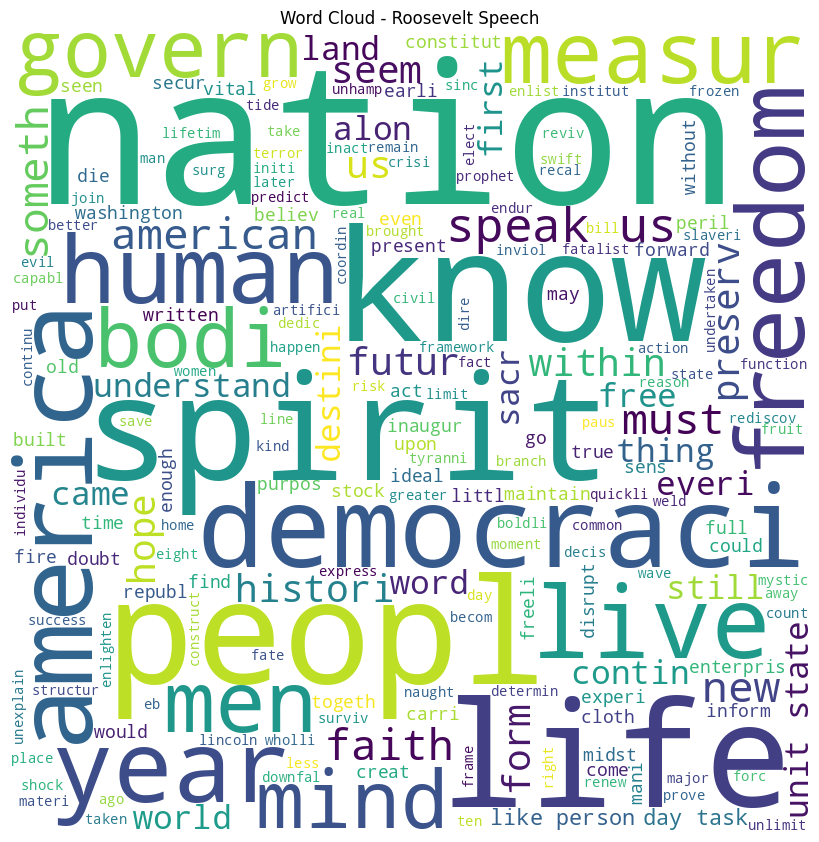

In [175]:
create_word_cloud(roosevelt_words, "Word Cloud - Roosevelt Speech")

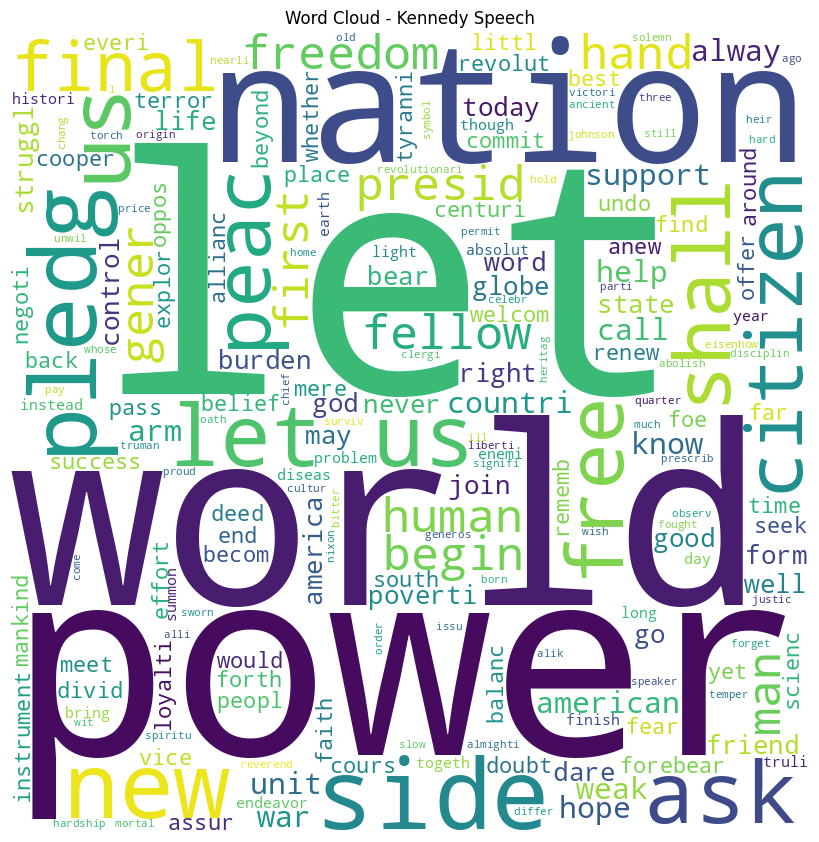

In [176]:
create_word_cloud(kennedy_words, "Word Cloud - Kennedy Speech")

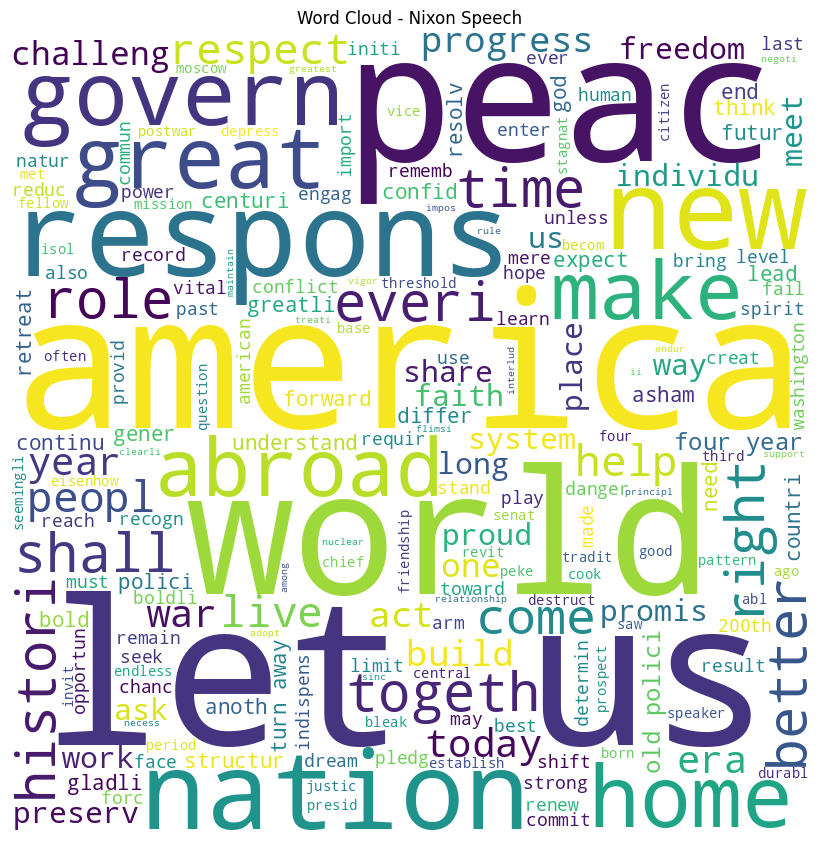

In [177]:
create_word_cloud(nixon_words, "Word Cloud - Nixon Speech")